<table>
 <tr align=left><td><img align=left src="https://github.com/D-Mayerfeld/intro-numerical-methods/blob/master/images/CC-BY.png?raw=1">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [1]:
from __future__ import print_function
from __future__ import absolute_import

%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Interpolation

Interpolation is a fundamental numerical problem that is central to many other numerical algorithms.  Simply put, given a finite number of points where values are known,  find an *interpolant*, a (usually) continuous function that returns values everywhere and is guaranteed to pass through the known data.  

## Objectives:

* Define an interpolant
* Understand **Polynomial** Interpolation and Approximation
    * Define the interpolating polynomial $P_N(x)$ that exactly interpolates $N+1$ points
    * Calculation (in the monomial basis)
    * Uniqueness
    * Other bases (Lagrange, Newton?)
    * Error Analysis
    * Chebyshev Polynomials and optimal interpolation
* Understand Other interpolants
    * Piecewise Polynomial interpolation
    * Overlapping Polynomial interpolation
    * Cubic Splines and other smooth interpolants
    * Higher dimensional Interpolation schemes and scipy.interpolate
    

### Interpolation (vs  Fitting)

**Definition:**  Given a discrete set of values $y_i$ at locations $x_i$, an **interpolant** is a (piece-wise) continuous function $f(x)$ that passes exactly through the data (*i.e.* $f(x_i) = y_i$).

A visual example for 3 random points

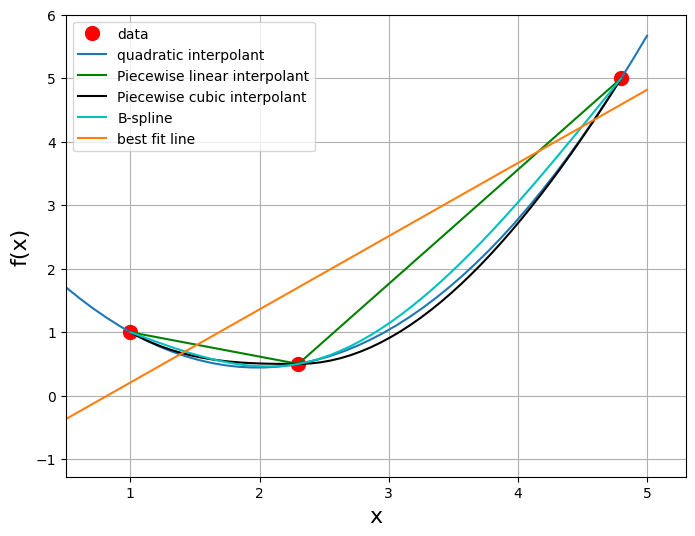

In [2]:
from scipy.interpolate import pchip_interpolate, make_interp_spline

N= 3
x = [ 1, 2.3, 4.8 ]
y = [ 1., 0.5, 5.0]
p2 = numpy.polyfit(x,y,2)
p1 = numpy.polyfit(x,y,1)

b_spline = make_interp_spline(x, y, bc_type="natural")

xa = numpy.linspace(0.,5)
xs = numpy.linspace(x[0],x[-1])

fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1,1,1)
axes.plot(x,y,'ro',markersize=10,label='data')
axes.plot(xa,numpy.polyval(p2, xa), label='quadratic interpolant')
axes.plot(x,y,'g', label='Piecewise linear interpolant')
axes.plot(xs,pchip_interpolate(x,y,xs),'k', label='Piecewise cubic interpolant')
axes.plot(xs,b_spline(xs),'c', label='B-spline')


axes.plot(xa,numpy.polyval(p1, xa), label='best fit line')
axes.legend(loc='best')
axes.set_xlim(min(x) - 0.5,max(x) + 0.5)
axes.set_xlabel('x',fontsize=16)
axes.set_ylabel('f(x)',fontsize=16)

axes.grid()
plt.show()

**Comment**:
In general a polynomial of degree $N$ can be used to interpolate $N+1$ data points. There are many choices of functions to use to interpolate values, but here we focus on polynomials.

And, within polynomial interpolants, there is a set of points to choose to interpolate to minimize the error.

## Applications

 - Data filling
 - Function approximation
 - Fundamental component of other algorithms
   - Root finding (secant method)
   - Optimization, minima/maxima (successive parabolic interpolation)
   - Numerical integration and differentiation
   - The Finite Element Method
   

## Polynomial Interpolation

**Theorem:**  There is a *unique* polynomial of degree $N$, $P_N(x)$, that passes exactly through $N + 1$ values $y_0, y_1, \ldots, y_N $ at *distinct* points $x_0, x_1, \ldots, x_N$.

Consequence of the number of unknowns in $P_N(x)$.

#### Example 1: 2 Points

Given two points $(x_0, y_0)$ and $(x_1, y_1)$, There is a unique line

$$P_1(x) = p_0 + p_1 x$$

that connects them. We simply need to use the data to find $p_0$ and $p_1$:

We first note that we have two equations and two unknowns. The two equations can be found by assuming the function $P_1(x)$ interpolates the two data points

$$
    \begin{matrix}
       P_1(x_0) = & p_0 + p_1 x_0  =& y_0  \\
       P_1(x_1) =& p_0 + p_1 x_1 = &   y_1 \\
    \end{matrix}
$$

We can also (and should) write this problem as a small $2\times2$ linear algebra problem $A\mathbf{x}=\mathbf{b}$

$$
    \begin{bmatrix}
       1 & x_0 \\
       1 & x_1 \\
    \end{bmatrix}
    \begin{bmatrix}
       p_0 \\
       p_1 \\
    \end{bmatrix}=\begin{bmatrix}
       y_0 \\
       y_1 \\
    \end{bmatrix}
$$

**Question:**  What are the unknowns,  and where does the data sit in $A$ and $\mathbf{b}$?

With a bit of algebra you should be able to show that the solution of this problem is

$$
    p_1 = \frac{y_1 - y_0}{x_1 - x_0}, \quad\quad
    p_0 = y_0 - \frac{y_1 - y_0}{x_1 - x_0} x_0
$$
    
and

$$P_1(x)  = \frac{y_1 - y_0}{x_1 - x_0} (x - x_0) + y_0$$

which is just the equation of the straight line with slope $p_1$, that connects the two points.


#### Example 2:  3 Points

Given three points  $(x_0, y_0)$, $(x_1, y_1)$, and $(x_2, y_2)$  leads to a quadratic polynomial:
$$P_2(x) = p_0 + p_1 x + p_2x^2$$

Again,  setting $P_2(x_i) = y_i$  yields 3 equations in 3 unknowns

$$ p_0 + p_1 x_0 + p_2 x_0^2  = y_0$$

$$ p_0 + p_1 x_1 + p_2 x_1^2  = y_1$$

$$ p_0 + p_1 x_2 + p_2 x_2^2  = y_2$$

Which reduces to the $3\times3$ linear system
$
    A(\mathbf{x})\mathbf{p} = \mathbf{y}
$

A more general approach to solving the system will be explored later, but first it is important to determine whether or not the system even has a solution.    

### Proof - Uniqueness of Polynomial Interpolants

Let

$$\mathcal{P}_N(x) = \sum^N_{n=0} p_n x^n $$
or
$$\mathcal{P}_N(x) = p_0 + p_1 x + \cdots + p_{N - 1} x^{N - 1} + p_{N} x^N$$

and require $\mathcal{P}_N(x_i) = y_i$ for $i=0,1,\ldots,N$ and $x_i \neq x_j ~~~ \forall i,j$.

### Preliminaries: Monomial Basis

We can think of  $\mathcal{P}_N(x) = \sum^N_{n=0} p_n x^n$ as a polynomial,  or more fundamentally as a *linear combination* of a set of simpler functions, the monomials

$$1, x, x^2, x^3, \ldots, x^{N-1}, x^N$$

with weights

$$p_0, p_1, p_2, p_3, \ldots, p_{N-1}, \text{and } p_N$$

respectively.  

### Linear independence of the Monomials

The monomials, form a *linearly independent* set of functions such that no monomial $x^n$ can be written as a linear combination of any other monomial.  We can see this graphically, for the first few monomials

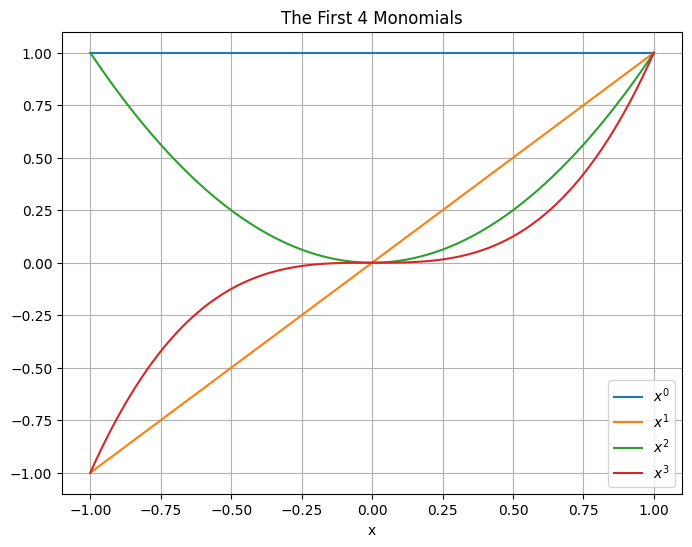

In [3]:
x = numpy.linspace(-1,1,100)
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1,1,1)
for n in range(4):
    axes.plot(x,x**n,label='$x^{}$'.format(n))
axes.set_xlabel('x')
axes.grid()
axes.legend(loc='best')
axes.set_title('The First 4 Monomials')
plt.show()

But more fundamentally. A set of functions is **linearly independent** if the only linear combination that add to form the zero function, e.g.

$$
    P_N(x) = p_0 1 + p_1 x + p_2 x^2 + \ldots + p_n x^n = 0
$$

is if all the coefficients $p_i = 0$, $\forall i=0,\ldots N$

**Theorem**:  The monomials $x^0,\ldots, x^n$ are linear independent.

**Proof**: consider $P_N(x) = 0$ for all $x$.  Since the polynomials (and monomials) are differentiable at least $n$ times,  differentiate $n$ times to yield
$$
    P^{(n)}_N(x) = n!p_n = 0
$$
which implies $p_n=0$.  

Using  this result and differentiating $n-1$ times shows $p_{n-1}=0$, which by induction gives all $p_i = 0$.

Put another way,  the only $n$th degree polynomial that is zero everywhere is if all coefficients are zero.

#### The Fundamental theorem of algebra

Every $n$th degree polynomial has exactly  $n$ complex roots, i.e.

$$
    P_N(x) = (x - a_1)(x - a_2)\ldots(x - a_n)
$$

for $a_i\in \mathbb{C}$.  Therefore, a _non-trivial_ $n$th order polynomial can only be zero at at most $n$ points.

### Proof - Uniqueness of Polynomial Interpolants

Let

$$\mathcal{P}_N(x) = \sum^N_{n=0} p_n x^n $$

**interpolate** the $N+1$ points $y_i$ at $x_i$.

i.e.
$$
    \mathcal{P}_N(x_i) = y_i,\quad \mathrm{for}\quad i=0,1,\ldots,N
$$
and $x_i \neq x_j ~~~ \forall i,j$.

Assume there exists another polynomial

$$Q_N(x) = \sum^N_{n=0} q_n x^n$$

that passes through the same set of points such that $Q_N(x_i) = y_i$.  Now compute $T_N(x) = \mathcal{P}_N(x) - Q_N(x)$:

Now, by construction,  $T_N(x_i) = 0$ which implies that it is equal to zero at $n+1$ points.  However,

$$T_N(x) = \mathcal{P}_N(x) - Q_N(x) = \sum^N_{n=0} p_n x^n - q_n x^n = \sum^N_{n=0} (p_n - q_n) x^n$$

is a $n$th order polynomial which has at most $n$ real roots.  The only way to reconcile this is if $T_n(x) = 0$, *for all* $x$, and therefore $p_n - q_n = 0$ individually and therefore $\mathcal{P}_N(x) = Q_N(x)$.

#### Example 3:  Monomial Basis

Consider $\mathcal{P}_3(x) = p_0 + p_1 x + p_2 x^2 + p_3 x^3$ with the four data points $(x_i, y_i), ~~ i = 0,1,2,3$.  We have four equations and four unknowns as expected:

$$\mathcal{P}_3(x_0) = p_0 + p_1 x_0 + p_2 x_0^2 + p_3 x_0^3 = y_0$$

$$\mathcal{P}_3(x_1) = p_0 + p_1 x_1 + p_2 x_1^2 + p_3 x_1^3 = y_1$$

$$\mathcal{P}_3(x_2) = p_0 + p_1 x_2 + p_2 x_2^2 + p_3 x_2^3 = y_2$$

$$\mathcal{P}_3(x_3) = p_0 + p_1 x_3 + p_2 x_3^2 + p_3 x_3^3 = y_3$$

Lets rewrite these as a matrix equation: First define the following vectors

$$\mathbf{x} = \begin{bmatrix} x_0 \\ x_1 \\ x_2 \\ x_3 \end{bmatrix} \quad \mathbf{y} = \begin{bmatrix} y_0 \\ y_1 \\ y_2 \\ y_3 \end{bmatrix} \quad \mathbf{p} = \begin{bmatrix} p_0 \\ p_1 \\ p_2 \\ p_3 \end{bmatrix}$$

When we write the system in matrix/vector form the matrix that arises is called a *Vandermonde* matrix:

$$
V = \begin{bmatrix}
     1 & x_0 & x_0^2 & x_0^3 \\
     1 & x_1 & x_1^2 & x_1^3 \\
     1 & x_2 & x_2^2 & x_2^3 \\
     1 & x_3 & x_3^2 & x_3^3
\end{bmatrix}.
$$

We can now write the system of linear equations


$$\mathcal{P}_3(x_0) = p_0 + p_1 x_0 + p_2 x_0^2 + p_3 x_0^3 = y_0$$

$$\mathcal{P}_3(x_1) = p_0 + p_1 x_1 + p_2 x_1^2 + p_3 x_1^3 = y_1$$

$$\mathcal{P}_3(x_2) = p_0 + p_1 x_2 + p_2 x_2^2 + p_3 x_2^3 = y_2$$

$$\mathcal{P}_3(x_3) = p_0 + p_1 x_3 + p_2 x_3^2 + p_3 x_3^3 = y_3$$

as $V(\mathbf{x}) \mathbf{p} = \mathbf{y}$:

$$\begin{bmatrix}
     1 & x_0 & x_0^2 & x_0^3 \\
     1 & x_1 & x_1^2 & x_1^3 \\
     1 & x_2 & x_2^2 & x_2^3 \\
     1 & x_3 & x_3^2 & x_3^3
\end{bmatrix} \begin{bmatrix} p_0 \\ p_1 \\ p_2 \\ p_3 \end{bmatrix} = \begin{bmatrix} y_0 \\ y_1 \\ y_2 \\ y_3 \end{bmatrix}.$$

**Note**: the columns  of $V$ are simply the monomial functions sampled at the discrete points $x_i$. i.e $V_j = \mathbf{x}^j$.

Because the monomials are linearly independent, so are the columns of $V$

$$\begin{bmatrix}
     1 & x_0 & x_0^2 & x_0^3 \\
     1 & x_1 & x_1^2 & x_1^3 \\
     1 & x_2 & x_2^2 & x_2^3 \\
     1 & x_3 & x_3^2 & x_3^3
\end{bmatrix} \begin{bmatrix} p_0 \\ p_1 \\ p_2 \\ p_3 \end{bmatrix} = \begin{bmatrix} y_0 \\ y_1 \\ y_2 \\ y_3 \end{bmatrix}$$

- What happens if we have redundant data?  Either $(x_i, y_i)$ is repeated or for one $i$ we have two values of $y$. If an x repeats there is no solution. If y repeats it's okay.
- What if we have more points then the order of polynomial we want? Can fit cubic to somethign with more points. In this case it is overdetermined and then becomes a fitting problem.
- How does this relate to solving the above linear system of equations?

Vandermonde matrices in general are defined as

$$V = \begin{bmatrix}
    1      & x_0    & x_0^2  & \cdots & x_0^N  \\
    1      & x_1    & x_1^2  & \cdots & x_1^N  \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1      & x_m    & x_m^2  & \cdots & x_m^N  \\
\end{bmatrix}
$$

where $V$ is a $m \times n$ matrix with points $(x_i, y_i)$ for $i = 0, 1, 2, 3, \ldots m$ and for an order $N$ polynomial $\mathcal{P}_N(x)$.

### Finding $p_i$

Finding the coefficients of $\mathcal{P}_N(x)$ can be done by solving the system outlined above.  There are functions in `numpy` that can do this for us such as:
 - `numpy.polyfit(x, y, x.shape[0] - 1)` This resurns the coefficients p. Here you put in x, y, and the number of coefficients to find (shape of x - 1).
 - `numpy.vander(x, N=None)` to construct the matrix and use a linear solver routine.

We can also use a different **basis** that might be easier to use.

### Basis

**Def:**  A basis for a $N$ dimensional vector space is a set of linearly independent vectors that span the space.

The monomials,  $1,x,\ldots, x^n$, form the usual basis for the vector space of $n$th degree polynomials $P_N(x)$.

**Example** $P_2(x)$ is the space of all quadratic functions. i.e. $P_2(x) = \mathrm{span}< 1,x,x^2>$

$$
    P_2(x) = p_0 + p_1 x + p_2 x^2
$$

i.e for every vector $\mathbf{p}\in\mathbb{R}^3$, there is a unique quadratic function in $P_2(x)$.  (we say $P_2$ is *isomorphic* to $\mathbb{R}^3$ and is a three dimensional function space).

**However**,  the monomials are not the only basis for $P_N$

### Lagrange Basis

Given $N+1$ points $(x_0,y_0), (x_1,y_1), \ldots, (x_{N},y_{N})$ again assuming the $x_i$ are all unique, the interpolating polynomial $\mathcal{P}_N(x)$ can also be written as

$$\mathcal{P}_N(x) = \sum^{N}_{i=0} y_i \ell_i(x)$$

where

$$\ell_i(x) = \prod^{N}_{j=0, j \neq i} \frac{x - x_j}{x_i - x_j} = \frac{x - x_0}{x_i - x_0} \frac{x - x_1}{x_i - x_1} \cdots \frac{x - x_{i-1}}{x_i - x_{i-1}}\frac{x - x_{i+1}}{x_i - x_{i+1}} \cdots \frac{x - x_{N}}{x_i - x_{N}}$$

are the **Lagrange Polynomials**

For qadratic need 3 linearly independent vectors for the basis. In polynomial space that would be $<1, x, x^2>$. In lagrange would be $\ell_0, \ell_1, \ell_2$ i.e. a set of 3 linearly independent polynomials.
At the $i$th node $\ell_i$ is 1 and all the rest are 0.

### Lagrange Polynomials

$$\ell_i(x) = \prod^{N}_{j=0, j \neq i} \frac{x - x_j}{x_i - x_j} $$

A Key property of the Lagrange polynomials is that

$$
    \ell_i(x_j) = \delta_{ij} = \left\{\begin{matrix}
            0 & i\neq j \\
            1 & i=j\\
            \end{matrix}\right.
$$
Meaning that at each x you give it, y will either be equal to 0 or 1.

which is why the weights in $P_N(x)$ are simply the $y$ values of the interpolant

### Visualizing the Lagrange Polynomials

In [4]:

# ====================================================
# Compute the Lagrange basis (\ell_i(x))
def lagrange_basis(x, data):
    """Compute Lagrange basis at x given N data points

    params:
    -------
        x: ndarray
            1-d Array of floats
        data: ndarray of shape (N,2)
            2-d Array of data where each row is [ x_i, y_i ]
    returns:
    --------
        basis: ndarray of shape (N, x.shape)
            : 2-D array of lagrange basis functions evaluated at x

    """
    basis = numpy.ones((data.shape[0], x.shape[0]))
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            if i != j:
                basis[i, :] *= (x - data[j, 0]) / (data[i, 0] - data[j, 0])
    return basis

In [5]:
# ====================================================
# Calculate full polynomial
def poly_interpolant(x, data):
    """Compute polynomial interpolant of (x,y) using Lagrange basis"""
    P = numpy.zeros(x.shape[0])
    basis = lagrange_basis(x, data)
    for n in range(data.shape[0]):
        P += basis[n, :] * data[n, 1]
    return P

# ====================================================

In [6]:
#x_data = numpy.array([0., 1.])
x_data = numpy.array([0., 1., 2.])
#x_data = numpy.array([0., 1., 2., 3.])
y_data = numpy.ones(x_data.shape)

data = numpy.array([x_data, y_data]).T
x = numpy.linspace(x_data.min(),x_data.max(),100)
basis = lagrange_basis(x, data)

<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:14: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:14: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-3953254087.py:8: SyntaxWarning: invalid escape sequence '\e'
  axes.plot(x, basis[i, :], label="$\ell_{%s}(x)$" % i)
/tmp/ipython-input-3953254087.py:12: SyntaxWarning: invalid escape sequence '\e'
  axes.set_title("Lagrange Basis $\ell_i(x)$")
/tmp/ipython-input-3953254087.py:14: SyntaxWarning: invalid escape sequence '\e'
  axes.set_ylabel("$\ell_i(x)$")


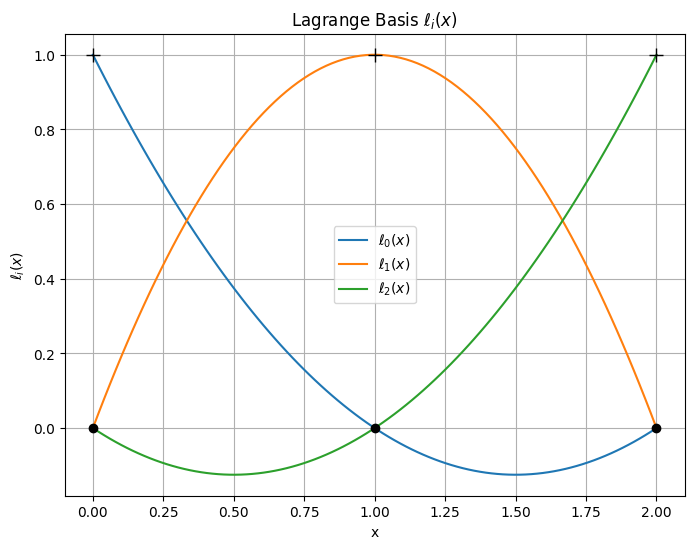

In [7]:
# ====================================================
# Plot individual basis functions

fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(1, 1, 1)
basis = lagrange_basis(x, data)
for i in range(len(x_data)):
    axes.plot(x, basis[i, :], label="$\ell_{%s}(x)$" % i)
axes.plot(x_data,numpy.zeros(x_data.shape),'ko')
axes.plot(x_data,y_data,'k+',markersize=10)

axes.set_title("Lagrange Basis $\ell_i(x)$")
axes.set_xlabel("x")
axes.set_ylabel("$\ell_i(x)$")
axes.grid()
axes.legend(loc='best')
plt.show()

### Solving for the coefficients of $P_N(x)$

In general,   if

$$
    P_N(x) = \sum_{j=0}^N w_j\phi_j(x)
$$
where $\phi_j(x)$ is any basis function for $P_N$ (i.e. monomial, Lagrange, and there are many more). Then finding the unique set of weights for the interpolating polynomial through $N+1$ distinct data points $(x_i, y_i)$, just reduces to solving $N+1$ linear equations $P_N(x_i) = y_i$.  

For the monomial basis this reduces to the linear system

$$
    V(\mathbf{x})\mathbf{w} = \mathbf{y}
$$

What is the matrix $V$ (the Vandermonde matrix), for the Lagrange Basis?  What are the weights $\mathbf{w}$?

Answer: $V_{ij} = \ell_i(x_j)$
and $V$ becomes the identity matrix, $V=I$.

The functions are discretely orthogonal: i.e. at the node only one of the functions is 1 and the rest are zero.

### Linear Independence of the Lagrange Polynomials

Because the weights of each basis function in the Lagrange basis is just the $y$ value at the interpolation points,  it is straightforward to show that the Lagrange polynomials are linearly independent.  I.e. the statement

$$
    \sum_{n=0}^N w_j\ell_j(x) =0
$$
is equivalent to interpolating the zero function,  where all the $w_j =0$

#### Example :  $N = 1$ 1st order general Lagrange Polynomial as linear interpolant

Given 2 points $(x_0, y_0)$ and $(x_1, y_1)$ the Lagrange form of $\mathcal{P}_N(x)$ is given by

$$\ell_0(x) = \frac{x - x_1}{x_0 - x_1}$$

and

$$\ell_1(x) = \frac{x - x_0}{x_1 - x_0}$$

and the 1st order interpolating Polynomial is simply

$$\mathcal{P}_1(x) = y_0\ell_0(x)+ y_1\ell_1(x)$$

The behavior of $\mathcal{P}_1(x)$ becomes clearer if we note that on the interval $x\in[x_0,x_1]$ that

$$
\ell_1(x) = \frac{x- x_0}{x_1 - x_0} = s
$$
is simply the fractional distance across the interval.
    

We should also note that

$$
\begin{align}
    \ell_0(x) &= \frac{x - x_1}{x_0 - x_1}\\
    &= 1-\ell_1(x) \\
    &= 1-s\\
    \end{align}
$$

(show this)

Then the interpolating polynomial is simply
$$
\begin{align}
\mathcal{P}_1(s) &= y_0(1-s) + y_1 s \\&= y_0 + s(y_1 - y_0)
\end{align}
$$

for $s\in[0,1]$ which is just the linear line segment that connects points $y_0$ and $y_1$

As a specific example we will plot $\ell_0(x)$, $\ell_1(x)$ and $\mathcal{P}_1$ for the interval
$x=[1,3]$  and $y_0=2$, $y_1=3$

In [8]:
x0, y0 = (1., 2)
x1, y1 = (3., 3.)
ell0 = lambda x: (x - x1)/(x0 - x1)
ell1 = lambda x: (x - x0)/(x1 - x0)
P1 = lambda x:  y0*ell0(x) + y1*ell1(x)

<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-3778184420.py:4: SyntaxWarning: invalid escape sequence '\e'
  axes.plot(x,ell0(x),'r',label='$\ell_0$')
/tmp/ipython-input-3778184420.py:5: SyntaxWarning: invalid escape sequence '\e'
  axes.plot(x,ell1(x),'b',label='$\ell_1$')


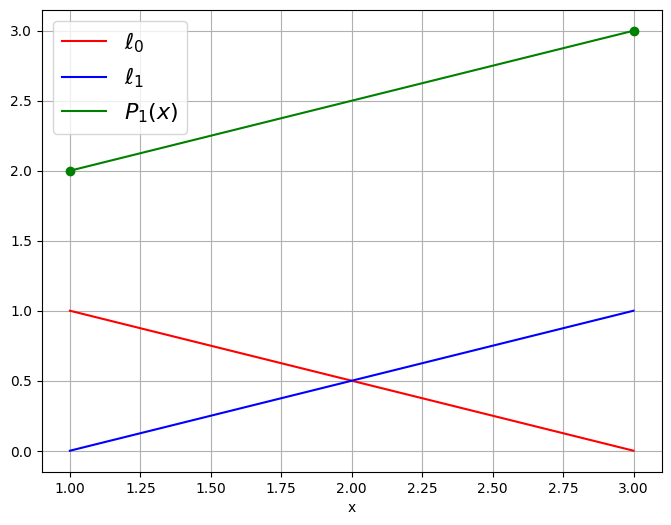

In [9]:
x = numpy.linspace(x0,x1)
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1,1,1)
axes.plot(x,ell0(x),'r',label='$\ell_0$')
axes.plot(x,ell1(x),'b',label='$\ell_1$')
axes.plot(x,P1(x),'g',label='$P_1(x)$')
axes.plot((x0,x1),(y0,y1),'go')
axes.set_xlabel('x')
axes.grid()
axes.legend(loc='best',fontsize=16)
plt.show()

#### Example: Interpolate six points from $\sin(2\pi x)$

Use six evenly spaced points to approximate $\sin$ on the interval $x \in [-1, 1]$.  What is the behavior as $N \rightarrow \infty$?  Also plot the absolute error between $f(x)$ and the interpolant $P_N(x)$.

In [10]:
num_points = 6

<>:21: SyntaxWarning: invalid escape sequence '\e'
<>:23: SyntaxWarning: invalid escape sequence '\e'
<>:25: SyntaxWarning: invalid escape sequence '\e'
<>:21: SyntaxWarning: invalid escape sequence '\e'
<>:23: SyntaxWarning: invalid escape sequence '\e'
<>:25: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-1466887489.py:21: SyntaxWarning: invalid escape sequence '\e'
  axes.plot(x, basis[i, :], label="$\ell_{%s}(x)$" % i)
/tmp/ipython-input-1466887489.py:23: SyntaxWarning: invalid escape sequence '\e'
  axes.set_title("Lagrange Basis $\ell_i(x)$",fontsize=16)
/tmp/ipython-input-1466887489.py:25: SyntaxWarning: invalid escape sequence '\e'
  axes.set_ylabel("$\ell_i(x)$")


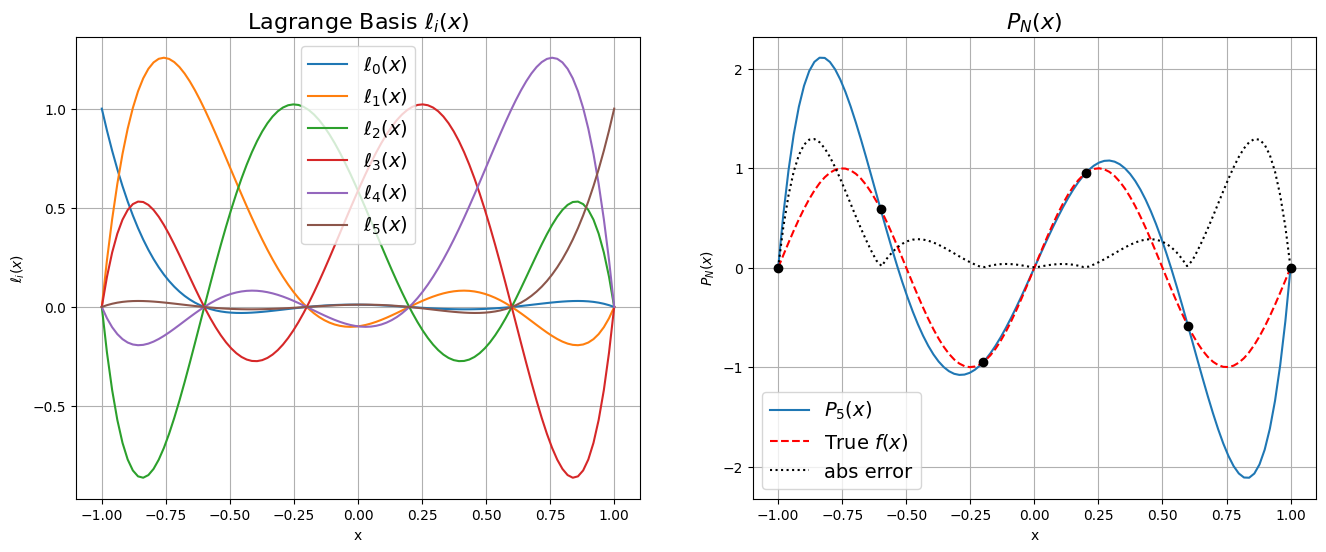

In [11]:
# num_points = 5
# num_points = 6
# num_points = 20
data = numpy.empty((num_points, 2))
data[:, 0] = numpy.linspace(-1, 1, num_points)
data[:, 1] = numpy.sin(2.0 * numpy.pi * data[:, 0])
N = data.shape[0] - 1 # Degree of polynomial
M = data.shape[0]
x = numpy.linspace(-1.0, 1.0, 100)

px = poly_interpolant(x, data)
f = numpy.sin(2.0 * numpy.pi * x)
err = numpy.abs(f - px)

# ====================================================
# Plot individual basis functions
fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1, 2, 1)
basis = lagrange_basis(x, data)
for i in range(N + 1):
    axes.plot(x, basis[i, :], label="$\ell_{%s}(x)$" % i)

axes.set_title("Lagrange Basis $\ell_i(x)$",fontsize=16)
axes.set_xlabel("x")
axes.set_ylabel("$\ell_i(x)$")
axes.legend(loc='best',fontsize=14)
axes.grid()

# Plot full polynomial P_N(x)
axes = fig.add_subplot(1, 2, 2)
axes.plot(x, px , label="$P_{%s}(x)$" % N)
axes.plot(x, numpy.sin(2.0 * numpy.pi * x), 'r--', label="True $f(x)$")
axes.plot(x, err, 'k', linestyle='dotted',label='abs error')
for point in data:
    axes.plot(point[0], point[1], 'ko')
axes.set_title("$P_N(x)$",fontsize=16)
axes.set_xlabel("x")
axes.set_ylabel("$P_N(x)$")
axes.legend(loc='best',fontsize=14)
axes.grid()

plt.show()

The error gets smaller if add more points, but the lagrange polynomials get very large and in this case cancel out, but that's just because you got lucky in this case.

#### Example 6: Runge's Function

Interpolate $f(x) = \frac{1}{1 + 25 x^2}$ using 6 points of your choosing on $x \in [-1, 1]$.

Try it with 11 points.

Keep increasing the number of points and see what happens.

In [12]:
def f(x):
    return 1.0 / (1.0 + 25.0 * x**2)

x = numpy.linspace(-1., 1., 100)
num_points = 6

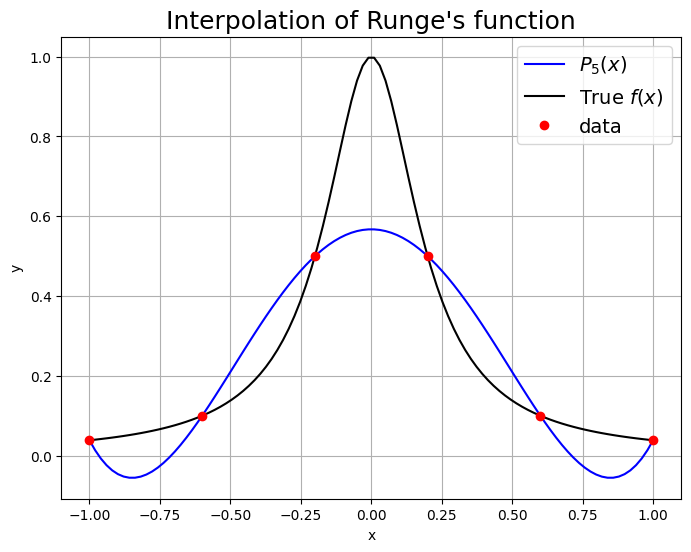

In [13]:

data = numpy.empty((num_points, 2))
data[:, 0] = numpy.linspace(-1, 1, num_points)
data[:, 1] = f(data[:, 0])
N = data.shape[0] - 1

# Plot the results
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, poly_interpolant(x, data), 'b', label="$P_{{{name}}}(x)$".format(name=num_points-1))
axes.plot(x, f(x), 'k', label="True $f(x)$")
axes.plot(data[:, 0], data[:, 1], 'ro', label="data")

axes.set_title("Interpolation of Runge's function",fontsize=18)
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend(loc='best',fontsize=14)
axes.grid()

plt.show()

And this one doesn't get better even if you add more points.

#### Example 7: Weierstrass "Monster" Function

Defined as
$$
    f(x) = \sum^\infty_{n=0} a^n \cos(b^n \pi x)
$$
such that
$$
    0 < a < 1 \quad \text{and} \quad a b > 1 + \frac{3\pi}{2}.
$$
This function is continuous everywhere but not differentiable anywhere.

6.357098867094099
6.357098867094099


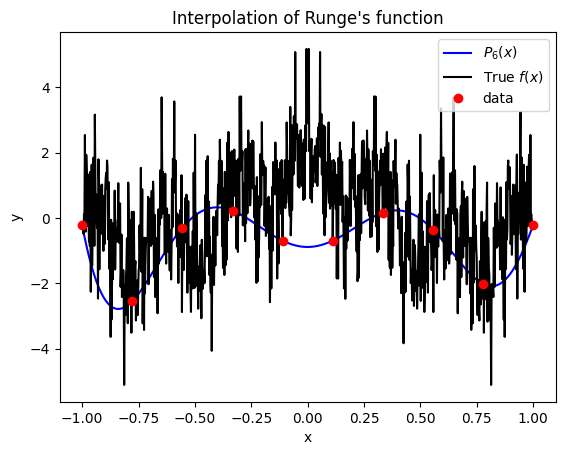

In [14]:
def f(x, a=0.9, N=100):
    summation = 0.0
    b = (1.0 + 3.0 / 2.0 * numpy.pi) / a + 0.01
    print(b)
    for n in range(N + 1):
        summation += a**n * numpy.cos(b**n * numpy.pi * x)
    return summation

x = numpy.linspace(-1, 1, 1000)
# x = numpy.linspace(-2, 2, 100)

num_points = 10
data = numpy.empty((num_points, 2))
data[:, 0] = numpy.linspace(-1, 1, num_points)
data[:, 1] = f(data[:, 0])
N = data.shape[0] - 1

# Plot the results
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, poly_interpolant(x, data), 'b', label="$P_6(x)$")
axes.plot(x, f(x), 'k', label="True $f(x)$")
axes.plot(data[:, 0], data[:, 1], 'ro', label="data")

axes.set_title("Interpolation of Runge's function")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend(loc=1)

plt.show()

### Rules of Thumb

 - Avoid high-order interpolants when possible!  Keep increasing the number of points and see what happens.
 - Avoid extrapolation - Increase the range of $x$ in the above example and check how good the approximation is beyond our sampling interval

### Error Analysis

**Theorem:** Lagrange Remainder Theorem - Let $f(x) \in C^{N+1}[-1, 1]$, then

$$
    f(x) = \mathcal{P}_N(x) + R_N(x)
$$

where $\mathcal{P}_N(x)$ is the interpolating polynomial and

$$
    R_N(x) = Q(x) \frac{f^{(N+1)}(c)}{(N+1)!} \quad \text{with} \quad c \in [-1,1]
$$
where
$$
    Q(x) = \prod^N_{i=0} (x - x_i) = (x-x_0)(x-x_1)\cdots(x-x_N) .
$$

is a *monic* polynomial (leading coefficient is 1) of order $N+1$ with exactly $N+1$ roots at the nodes $x_i$

A few things to note:
 - For Taylor's theorem note that $Q(x) = (x - x_0)^{N+1}$ and the error only vanishes at $x_0$.
 - For Lagrange's theorem the error vanishes at all $x_i$.
 - To minimize $R_N(x)$ requires minimizing $|Q(x)|$ for $x \in [-1, 1]$. This can only be minimized by choosing better $x_i$ points as that is the only input into $Q(x)$ that you choose.

#### Minimizing $R_N(x)$

Minimizing the error $R_N(x)$ in Lagrange's theorem is equivalent to minimizing $|Q(x)|$ for $x \in [-1, 1]$.

Minimizing error $\Leftrightarrow$ picking roots of $Q(x)$ or picking the points where the interpolant data is located.  How do we this?

### Chebyshev Polynomials

*Chebyshev polynomials* $T_N(x)$ are another basis that can be used for interpolation.

First 5 polynomials
$$T_0(x) = 1$$

$$T_1(x) = x$$

$$T_2(x) = 2 x^2 - 1$$

$$T_3(x) = 4 x^3 - 3 x$$

$$T_4(x) = 8x^4 - 8x^2 + 1$$

In general,  the Chebyshev polynomials are generated by a recurrence relation

$$T_k(x) = 2 x T_{k-1}(x) - T_{k-2}(x)$$

In [15]:
def cheb_poly(x, N):
    """Compute the *N*th Chebyshev polynomial and evaluate it at *x*"""
    T = numpy.empty((3, x.shape[0]))
    T[0, :] = numpy.ones(x.shape)
    T[1, :] = x
    if N == 0:
        return T[0, :]
    elif N == 1:
        return T[1, :]
    else:
        for k in range(2, N + 1):
            T[2, :] = 2.0 * x * T[1, :] - T[0, :]
            T[0, :] = T[1, :]
            T[1, :] = T[2, :]

        return T[2, :]

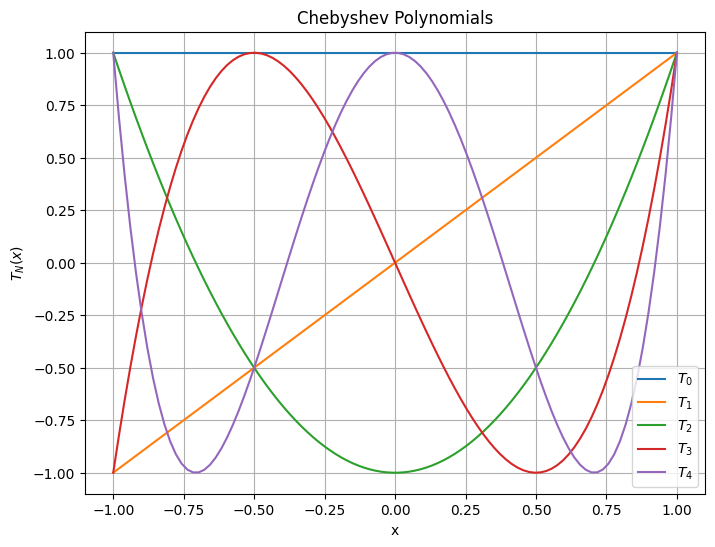

In [16]:
x = numpy.linspace(-1, 1, 100)

fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)

for n in range(5):
    axes.plot(x, cheb_poly(x, n), label="$T_%s$" % n)

axes.set_ylim((-1.1, 1.1))
axes.set_title("Chebyshev Polynomials")
axes.set_xlabel("x")
axes.set_ylabel("$T_N(x)$")
axes.legend(loc='best')
axes.grid()

plt.show()

#### Chebyshev nodes

Chebyshev polynomials have many special properties and locations including the location of their roots and extrema known as Chebyshev nodes


* Chebyshev nodes of the 1st kind (roots)

$$
    x_k = \cos \left (\frac{(2 k - 1) \pi}{2 N} \right ) \quad k = 1, \ldots, N
$$

* Chebyshev nodes of the 2nd kind (extrema)

$$
    x_k = \cos \left( \frac{k \pi}{N} \right) \quad k = 0, \ldots, N
$$

The other nice property here is that their amplitude is bounded by 1, so they never overshoot (unlike Lagrange).

In [17]:
N = 6
x_extrema = numpy.cos(numpy.arange(N + 1) * numpy.pi / N)
x_nodes = numpy.cos((2.0 * numpy.arange(1, N + 1) - 1.0) / (2.0 * N) * numpy.pi)

Nodes   = [-0.96592583 -0.70710678 -0.25881905  0.25881905  0.70710678  0.96592583]
Extrema = [-1.00000000e+00 -8.66025404e-01 -5.00000000e-01  6.12323400e-17
  5.00000000e-01  8.66025404e-01  1.00000000e+00]


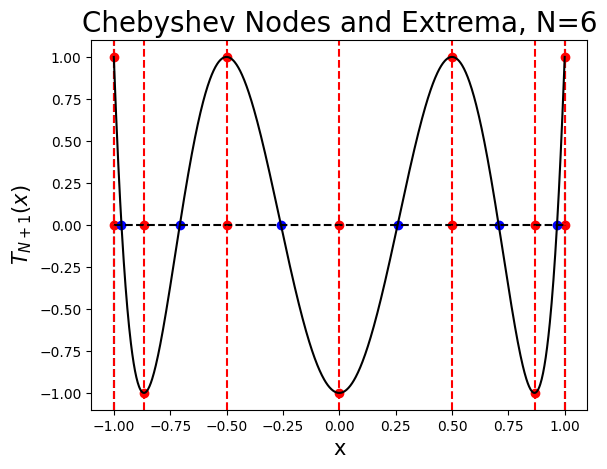

In [18]:
fig = plt.figure()
# fig.set_figwidth(fig.get_figwidth() * 2)
axes = fig.add_subplot(1, 1, 1)

# Plot points
axes.plot(x_extrema, numpy.zeros(N+1), 'ro')
axes.plot(x_nodes, numpy.zeros(N), 'bo')

# Plot some helpful lines
axes.plot((-1.0, -1.0), (-1.1, 1.1), 'k--')
axes.plot((1.0, 1.0), (-1.1, 1.1), 'k--')
axes.plot((-1.0, 1.0), (0.0, 0.0), 'k--')
for i in range(x_extrema.shape[0]):
    axes.plot((x_extrema[i], x_extrema[i]), (-1.1, 1.1), 'r--')
    axes.plot(x_extrema[i], cheb_poly(x_extrema, N)[i], 'ro')

print('Nodes   = {}'.format(numpy.sort(x_nodes)))
print('Extrema = {}'.format(numpy.sort(x_extrema)))
#print(numpy.cos(x_extrema))

# Plot Chebyshev polynomial
x_hat = numpy.linspace(-1, 1, 1000)
axes.plot(x_hat, cheb_poly(x_hat, N), 'k')
axes.set_xlim((-1.1, 1.1))
axes.set_ylim((-1.1, 1.1))

# Labels
axes.set_title("Chebyshev Nodes and Extrema, N={}".format(N), fontsize="20")
axes.set_xlabel("x", fontsize="15")
axes.set_ylabel("$T_{N+1}(x)$", fontsize="15")

plt.show()

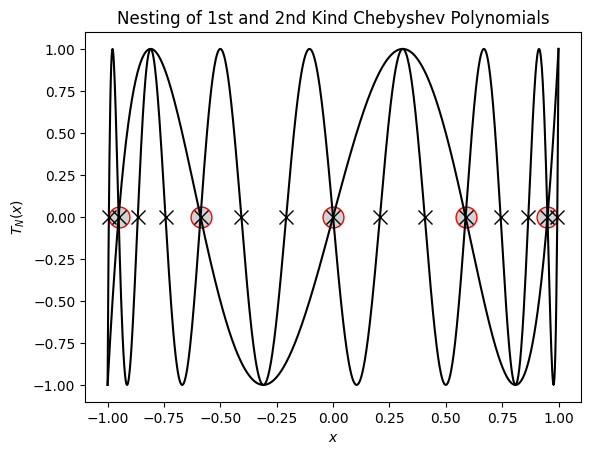

In [19]:
# First-kind Nesting (3 x)
fig = plt.figure()
# fig.set_figwidth(fig.get_figwidth() * 2)
axes = fig.add_subplot(1, 1, 1)

N = 5
factor = 3
x_1 = numpy.cos((2.0 * numpy.arange(1, N + 1) - 1.0) / (2.0 * N) * numpy.pi)
x_2 = numpy.cos((2.0 * numpy.arange(1, factor * N + 1) - 1.0) / (2.0 * factor * N) * numpy.pi)

axes.plot(x_1, numpy.zeros(N), "o", color="r", markerfacecolor="lightgray", markersize="15")
axes.plot(x_2, numpy.zeros(N * factor), 'kx', markersize="10")

x_hat = numpy.linspace(-1, 1, 1000)
axes.plot(x_hat, cheb_poly(x_hat, N), 'k')
axes.plot(x_hat, cheb_poly(x_hat, factor * N), 'k')
axes.set_xlim((-1.1, 1.1))
axes.set_ylim((-1.1, 1.1))
axes.set_title("Nesting of 1st and 2nd Kind Chebyshev Polynomials")
axes.set_xlabel("$x$")
axes.set_ylabel("$T_N(x)$")
plt.show()

#### Properties of Chebyshev Polynomials
1. Defined by a recurrence relation
   $$ T_0(x) = 1,\quad T_1(x) = x$$
   $$T_k(x) = 2 x T_{k-1}(x) - T_{k-2}(x),\quad k\geq2$$

2. Leading coefficient of $x^N$ in $T_N(x)$ is $2^{N-1}$ for $N \geq 1$

3. Extreme values:

   $$|T_N(x)| \leq 1 \quad \text{for} \quad  -1 \leq x \leq 1$$


#### Properties of Chebyshev Polynomials
4. Minimax principle:  The polynomial

   $$T(x) = \frac{T_{N+1}(x)}{2^N}$$
   
   is a *monic polynomial*, a univariate function with the leading coefficient equal to 1, with the property that
   
   $$
       \max |T(x)| \leq \max |Q(X)| \quad \text{for} \quad  x \in [-1, 1], \quad \text{and}
   $$
   $$
       \max |T(x)| = \frac{1}{2^N}
   $$

   Meaning this is the smallest amplitude monic polynomial you can choose!
  

 Recall that the remainder term in the Lagrange Remainder Theorem was
   $$
        R_N(x) = Q(x) \frac{f^{(N+1)}(c)}{(N+1)!} \quad \text{with} \quad c \in [-1,1]
   $$
   with
   $$
        Q(x) = \prod^N_{i=0} (x - x_i) = (x-x_0)(x-x_1)\cdots(x-x_N) .
   $$

#### Error Analysis Redux

Given that the Chebyshev polynomials are a minimum on the interval $[-1, 1]$ we would like $Q(x) = T(x)$.  

Since we only know the roots of $Q(x)$ (the points where the interpolant data is located) we require these points to be the roots of the Chebyshev polynomial $T_{N+1}(x)$ therefore enforcing $T(x) = Q(x)$.

The zeros of $T_N(x)$ in the interval $[-1, 1]$ can be shown to satisfy
$$
    x_k = \cos\left( \frac{(2k - 1) \pi}{2 N} \right ) \quad \text{for} \quad k=1, \ldots, N
$$
These nodal points (sampling the function at these points) can be shown to minimize interpolation error.

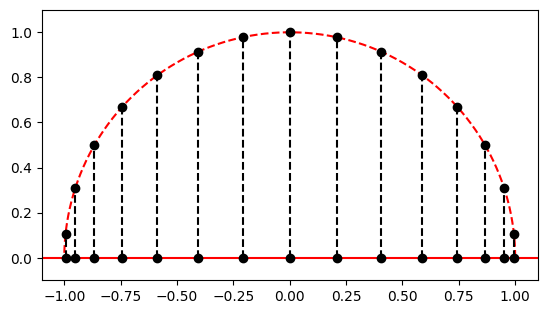

In [20]:
x = numpy.linspace(0, numpy.pi, 100)
N = 15

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1, aspect="equal")

axes.plot(numpy.cos(x), numpy.sin(x), 'r--')
axes.plot(numpy.linspace(-1.1, 1.1, 100), numpy.zeros(x.shape), 'r')
for k in range(1, N + 1):
    location = [numpy.cos((2.0 * k - 1.0) * numpy.pi / (2.0 * N)),
                numpy.sin((2.0 * k - 1.0) * numpy.pi / (2.0 * N))]
    axes.plot(location[0], location[1], 'ko')
    axes.plot(location[0], 0.0, 'ko')
    axes.plot([location[0], location[0]], [0.0, location[1]], 'k--')

axes.set_xlim((-1.1, 1.1))
axes.set_ylim((-0.1, 1.1))
plt.show()

#### Summary

1. Minimizing the error in Lagrange's theorem is equivalent to minimizing
$$
    |Q(x)| \quad \text{for} \quad x \in [-1, 1].
$$
1. We know Chebyshev polynomials are a minimum on the interval $[-1, 1]$ so we would like to have $Q(x)=T(x)$.
1. Since we only know the roots of $Q(x)$ (the points where the interpolant data is located) we require these points to be the roots of the Chebyshev polynomial $T_{N+1}(x)$ therefore enforcing $T(x) = Q(x)$.
1. The zeros of $T_N(x)$ in the interval $[-1, 1]$ can be shown to satisfy
$$
    x_k = \cos\left( \frac{(2k - 1) \pi}{2 N} \right ) \quad \text{for} \quad k=1, \ldots, N
$$
These nodal points (sampling the function at these points) can be shown to minimize interpolation error.

#### Notes
 - The Chebyshev nodes minimize interpolation error for any polynomial basis (due to uniqueness of the interpolating polynomial, any polynomial that interpolates these points are identical regardless of the basis).
 - Chebyshev nodes uniquely define the Chebyshev polynomials.
 - The boundedness properties of Chebyshev polynomials are what lead us to the roots as a minimization but there are other uses for these orthogonal polynomials.
 - There are two kinds of Chebyshev nodes and therefore two definitions.

### Example:  Chebyshev Interpolation of Runge's function

Comparison between interpolation at Chebyshev Nodes vs equally spaced points

In [21]:
# Runge's function again
def f(x):
    return 1.0 / (1.0 + 25.0 * x**2)

# Parameters
x = numpy.linspace(-1., 1., 100)
num_points = 6

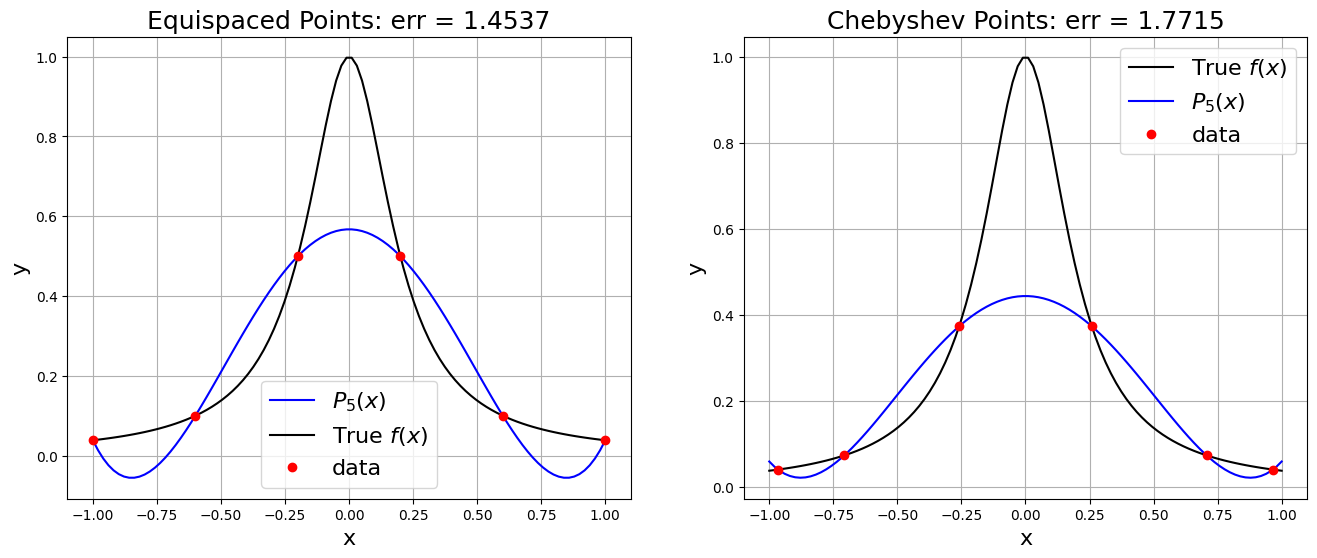

In [22]:
# ============================================================
#  Equidistant nodes
equidistant_data = numpy.empty((num_points, 2))
equidistant_data[:, 0] = numpy.linspace(-1, 1, num_points)
equidistant_data[:, 1] = f(equidistant_data[:, 0])
N = equidistant_data.shape[0] - 1

P_lagrange = poly_interpolant(x, equidistant_data)

# ============================================================
#  Chebyshev nodes
chebyshev_data = numpy.empty((num_points, 2))
chebyshev_data[:, 0] = numpy.cos((2.0 * numpy.arange(1, num_points + 1) - 1.0) * numpy.pi / (2.0 * num_points))
chebyshev_data[:, 1] = f(chebyshev_data[:, 0])

P_cheby1 = poly_interpolant(x, chebyshev_data)

# Fit directly with Chebyshev polynomials
coeff = numpy.polynomial.chebyshev.chebfit(chebyshev_data[:, 0], chebyshev_data[:, 1], N)
P_cheby2 = numpy.polynomial.chebyshev.chebval(x, coeff)

# Check on unique polynomials
#print(numpy.allclose(P_cheby1, P_cheby2))

# calculate errornorms for different interpolants
equidistant_err = numpy.linalg.norm(P_lagrange - f(x))
cheb_err = numpy.linalg.norm(P_cheby1 - f(x))

# ============================================================
# Plot the results
fig = plt.figure(figsize=(16,6))
fig.subplots_adjust(hspace=.5)

axes = fig.add_subplot(1, 2, 1)
axes.plot(x, P_lagrange, 'b', label='$P_{{ {} }}(x)$'.format(N))
axes.plot(x, f(x), 'k', label="True $f(x)$")
axes.plot(equidistant_data[:, 0], equidistant_data[:, 1], 'ro', label="data")
axes.set_title("Equispaced Points: err = {:5.5g}".format(equidistant_err),fontsize=18)
axes.set_xlabel("x",fontsize=16)
axes.set_ylabel("y",fontsize=16)
axes.grid()
axes.legend(loc=8,fontsize=16)
#print('Equispaced error = {}'.format(numpy.linalg.norm(P_lagrange - f(x))))

axes = fig.add_subplot(1, 2, 2)
axes.plot(x, f(x), 'k', label="True $f(x)$")
axes.plot(x, P_cheby1, 'b', label='$P_{{ {} }}(x)$'.format(N))
axes.plot(chebyshev_data[:, 0], chebyshev_data[:, 1], 'ro', label="data")

axes.set_title("Chebyshev Points: err = {:5.5g}".format(cheb_err),fontsize=18)
axes.set_xlabel("x",fontsize=16)
axes.set_ylabel("y",fontsize=16)
axes.legend(loc=1,fontsize=16)
axes.grid()
#print('Chebyshev error = {}'.format(numpy.linalg.norm(P_cheby1 - f(x))))


plt.show()

At low number of points it's not great, but as the number of points increase, the Chebychev points lead to a much closer approximation and lower error.

Note: Remember that the only thing you are using from Chebychev is the points you choose. The rest you are doing with Lagrange.

### Affine Transformation of intervals

While the chebyshev polynomials (and their roots) are defined on the interval
$$
    s \in[-1, 1]
$$

it turns out we can use them to approximate functions on any arbitrary interval $x\in[a,b]$ as long as we can map the interval $[-1,1]$ onto $[a,b]$.   This is easy to do given the  *affine transformation*

$$
    x(s) = \alpha + \beta s
$$

defined by a scaling $\beta$ and a shift $\alpha$

To solve for $\alpha$ and $\beta$, we simply transform the two endpoints such that
$$
\begin{align}
    x(-1) &= \alpha - \beta  = a \\
    x(1) &= \alpha + \beta  = b \\
\end{align}
$$

or

$$
    \begin{bmatrix} 1 & -1 \\ 1 & 1\end{bmatrix}\begin{bmatrix} \alpha \\ \beta \end{bmatrix}=\begin{bmatrix} a \\ b \end{bmatrix}
$$



or solving

$$
    \begin{align}
        \alpha &= \frac{a+b}{2} \\
        \beta &= \frac{b -a}{2}\\
        \end{align}
$$



### Affine Transformation of intervals

Thus if we know the Chebyshev nodes for $s\in[-1, 1]$
$$
    s_k = \cos\left( \frac{(2k - 1) \pi}{2 N} \right ) \quad \text{for} \quad k=1, \ldots, N
$$

then the correct interpolation points on $[a,b]$ are simply $x_k = x(s_k)$

For example:  if $s_k=0$ (in the center of the interval), then

$$x_k = x(0) = \frac{a+b}{2}$$

### Note

Affine Transformation of the interval is useful for may problems and applications.

## Piece-Wise Polynomial Interpolation

Given $N$ points, use lower order polynomial interpolation to fit the function in pieces.  We can choose the order of the polynomials and the continuity.

 - $C^0$: Interpolant is continuous
   - Linear interpolation (a "conect the dots" function)
   - Quadratic interpolation
 - $C^1$: Interpolation and 1st derivative are continuous
   - Cubic Hermite polynomials (PCHiP)
 - $C^2$: Interpolation, 1st and 2nd derivatives are continuous (these are the smoothest)
   - Cubic splines

### Piece-Wise Linear

Given a segment between point $(x_k, y_k)$and $(x_{k+1}, y_{k+1})$ we can do linear interpolation for all $x\in[x_k, x_{k+1}]$ as

$$
    \mathcal{P}_k(x) = y_k(1 - s) + y_{k+1}s
$$

where
$$
    s = \frac{x - x_k}{x_{k+1} - x_k}
$$

is the fractional distance of $x$ within the segment (i.e. $s=\ell_1(x)$ for $x\in[x_k, x_{k+1}]$)

->Essentially, just draw a line between the two nodes

In [23]:
def piece_wise_linear_interp(x, data):
    """ return the piecewise linear interpolant of x given an array of data points"""
    x_data = data[:,0]
    y_data = data[:,1]

    y = numpy.zeros(x.shape)

    # loop over segments
    n_segments = len(data) - 1
    for k in range(n_segments):
        # define endpoints of the segment k
        xk  = x_data[k]
        xkp = x_data[k+1]

        # find the index of all x data within segment k
        indx = (x >= xk )*( x <= xkp)

        # calculate the fractional distance within the element (l_1(x))
        s = (x[indx] - xk)/(xkp - xk)

        # linear interpolation within the segment
        y[indx] = y_data[k]*(1. - s) + y_data[k+1]*s

    return y


In [24]:
data = numpy.array([[1.0, 3.0], [2.0, 1.0], [3.5, 4.0], [5.0, 0.0], [6.0, 0.5], [9.0, -2.0], [9.5, -3.0]])
x = numpy.linspace(0.0, 10, 100)


# Interpolating polynmial through the data
P_lagrange = poly_interpolant(x, data)

# Piecewise linear interpolatnt between the data
P_linear = piece_wise_linear_interp(x, data)


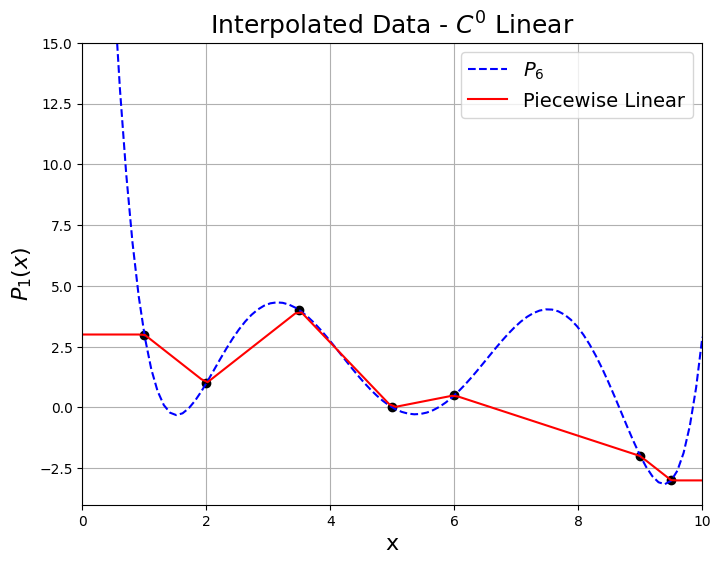

In [25]:
# Add end points for continuity
P_linear += numpy.ones(x.shape) * data[0, 1] * (x < data[0, 0])
P_linear += numpy.ones(x.shape) * data[-1, 1] * (x >= data[-1, 0])
N = len(data)-1

# Plot
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)

axes.plot(data[:,0], data[:,1], 'ko')
axes.plot(x, P_lagrange, 'b--',label='$P_{{{name}}}$'.format(name=N))
axes.plot(x, P_linear, 'r',label='Piecewise Linear')

axes.set_title("Interpolated Data - $C^0$ Linear",fontsize=18)
axes.set_xlabel("x",fontsize=16)
axes.set_ylabel("$P_1(x)$",fontsize=16)
axes.set_xlim([0.0, 10.0])
axes.set_ylim([-4.0, 15.0])
axes.legend(loc='best',fontsize=14)
axes.grid()

plt.show()

### Piece-Wise Quadratic $C^0$ Polynomials

Use every three points $(x_{k+1}, y_{k+1})$, $(x_{k}, y_{k})$, and $(x_{k-1}, y_{k-1})$, to find quadratic interpolant and define final interpolant $P(x)$ using the quadratic interpolant $\mathcal{P}_k(x)$ on $[x_{k-1}, x_{k+1}]$.

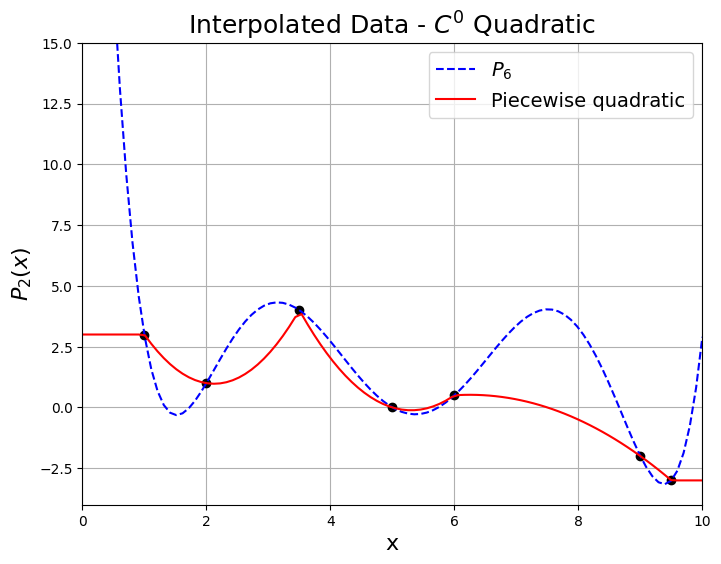

In [26]:
data = numpy.array([[1.0, 3.0], [2.0, 1.0], [3.5, 4.0], [5.0, 0.0], [6.0, 0.5], [9.0, -2.0], [9.5, -3.0]])
x = numpy.linspace(0.0, 10, 100)
N = data.shape[0] - 1

# This isn't overlapping, it's more like C_0 P_2
# C^0 Piece-wise quadratic
P_quadratic = numpy.zeros(x.shape)
for k in range(1, N + 1, 2):
    p = numpy.polyfit(data[k - 1:k + 2, 0], data[k - 1:k + 2, 1], 2)
    P_quadratic += numpy.polyval(p, x) * (x > data[k - 1, 0]) * (x <= data[k + 1, 0])
# Add end points for continuity
P_quadratic += numpy.ones(x.shape) * data[0, 1] * (x < data[0, 0])
P_quadratic += numpy.ones(x.shape) * data[-1, 1] * (x >= data[-1, 0])

# Plot
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)

axes.plot(data[:,0], data[:,1], 'ko')
axes.plot(x, P_lagrange, 'b--',label='$P_{{{name}}}$'.format(name=N))
axes.plot(x, P_quadratic, 'r',label='Piecewise quadratic')

axes.set_title("Interpolated Data - $C^0$ Quadratic",fontsize=18)
axes.set_xlabel("x",fontsize=16)
axes.set_ylabel("$P_2(x)$",fontsize=16)
axes.set_xlim([0.0, 10.0])
axes.set_ylim([-4.0, 15.0])
axes.legend(loc='best',fontsize=14)
axes.grid()

plt.show()

### Transformation of intervals

The previous algorithms are quite direct but can look a bit messy because every interval (or set of points) appears different...An important trick that is used in finite-element analysis is to transform each interval (or element)

$$
    x \in[x_k, x_{k+1}]
$$

to the unit interval

$$
    s \in [0,1]
$$

by the affine transformation

$$ x(s) = x_k + s(x_{k+1} - x_k)$$

and do all the interpolation in the transformed frame.

### Example: Linear Interpolation

for Linear interpolation over an arbitrary interval $[x_k, x_{k+1}]$ we can use a Lagrange interpolant

$$
    P_k(x) = y_k\ell_0(x) + y_{k+1}\ell_1(x)
$$

where
$$
    \ell_0(x) = \frac{x - x_{k+1}}{x_k - x_{k+1}},~\quad~  \ell_1(x) = \frac{x - x_{k}}{x_{k+1} - x_{k}}
$$

and do all the interpolation in the transformed frame.

Substituting
$$ x(s) = x_k + s(x_{k+1} - x_k)$$

into the definitions of $\ell_0(x)$ and $\ell_1(x)$ show that within this element

$$
    \ell_0(s) = 1-s,~\quad~\ell_1(s) = s
$$

and
$$
    P_k(s) = y_k(1-s)  + y_{k+1}s
$$


<>:10: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:10: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-2430730741.py:10: SyntaxWarning: invalid escape sequence '\e'
  axes.plot(x,ell0(x),'r',label='$\ell_0$')
/tmp/ipython-input-2430730741.py:11: SyntaxWarning: invalid escape sequence '\e'
  axes.plot(x,ell1(x),'b',label='$\ell_1$')


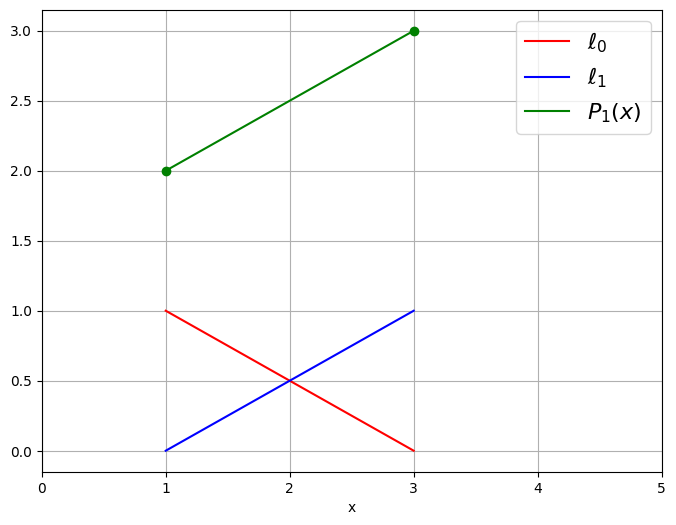

In [27]:
xk = [ .5, 1., 3., 5.]
yk = [ .5, 2., 2.5, 1. ]
ell0 = lambda x: (x - x1)/(x0 - x1)
ell1 = lambda x: (x - x0)/(x1 - x0)
P1 = lambda x:  y0*ell0(x) + y1*ell1(x)

x = numpy.linspace(x0,x1)
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1,1,1)
axes.plot(x,ell0(x),'r',label='$\ell_0$')
axes.plot(x,ell1(x),'b',label='$\ell_1$')
axes.plot(x,P1(x),'g',label='$P_1(x)$')
axes.plot((x0,x1),(y0,y1),'go')
axes.set_xlabel('x')
axes.set_xlim(0.,5.)
axes.grid()
axes.legend(loc='best',fontsize=16)
plt.show()

### Piece-Wise $C^1$ Cubic Interpolation

For the previous two cases we had discontinous 1st derivatives!  We can make this better by constraining the polynomials to be continuous at the boundaries of the piece-wise intervals.

Given a segment between points $(x_k, y_k)$ and $(x_{k+1}, y_{k+1})$ we want to fit a cubic function between the two points.

$$\mathcal{P}_k(x) = p_0 + p_1 x + p_2 x^2 + p_3 x^3$$

$$\mathcal{P}_k(x_k) = y_k, \quad \mathcal{P}_k(x_{k+1}) = y_{k+1}$$

Now we have 4 unknowns but only two data points!  Constraining the derivative at each interval end will lead to two new equations and therefore we can solve for the interpolant.

$$\frac{\text{d}}{\text{dx}} \mathcal{P}_k(x_k) = d_k, \quad \frac{\text{d}}{\text{dx}} \mathcal{P}_k(x_{k+1}) = d_{k+1}$$

where we need to prescribe the $d_k$'s.  Since we know the polynomial we can write these 4 equations as

$$\begin{aligned}
p_0 + p_1 x_k + p_2 x_k^2 + p_3 x_k^3 &= y_k \\
p_0 + p_1 x_{k+1} + p_2 x_{k+1}^2 + p_3 x_{k+1}^3 &= y_{k+1} \\
p_1 +  2p_2 x_k + 3 p_3 x_k^2 &= d_k \\
p_1 + 2 p_2 x_{k+1} + 3 p_3 x_{k+1}^2 &= d_{k+1}
\end{aligned}$$

Rewriting this as a system we get
$$\begin{bmatrix}
    1 & x_k & x_k^2 & x_k^3 \\
    1 & x_{k+1} & x_{k+1}^2 & x_{k+1}^3 \\
    0 & 1 & 2 x_k & 3 x_k^2 \\
    0 & 1 & 2 x_{k+1} & 3 x_{k+1}^2
\end{bmatrix} \begin{bmatrix}
p_0 \\ p_1 \\ p_2 \\ p_3
\end{bmatrix} = \begin{bmatrix}
y_k \\ y_{k+1} \\ d_k \\ d_{k+1}
\end{bmatrix}$$

A common simplification to the problem description re-parameterizes the locations of the points such that $s \in [0, 1]$ (an afine transformation where $x(s)=x_k+hs$ where $h$ is the width of the interval) and recast the problem with $(0, y_k)$ and $(1, y_{k+1})$.  This simplifies the above system to
$$\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 \\
    0 & 1 & 0 & 0 \\
    0 & 1 & 2 & 3
\end{bmatrix} \begin{bmatrix}
p_0 \\ p_1 \\ p_2 \\ p_3
\end{bmatrix} = \begin{bmatrix}
y_k \\ y_{k+1} \\ d^*_k \\ d^*_{k+1}
\end{bmatrix}$$

which can be solved to find

$$\begin{aligned}
\mathcal{P}(s) &= (1-s)^2 (1 + 2s) y_k + s^2 (3 - 2 s) y_{k+1} + s (1 - s)^2 d^*_k - s^2 (1 - s)d^*_{k+1}\\
\mathcal{P}'(s) &= 6s(s-1) y_k + 6s(1-s) y_{k+1} + (s-1)(3s-1) d^*_k + s(3s-2) d^*_{k+1}\\
\mathcal{P}''(s) &= 6 (1-2s)(y_{k+1} - y_k) + (6s - 4) d^*_k + (6s-2) d^*_{k+1}
\end{aligned}$$

where $d^*_k=P'(0)$ is the slope at point $k$ in the **transformed frame** (likewise $d^*_{k+1}=P'(1)$)

#### 2 Questions

* what is the relationship between $d^*_k = P'(s)$ in the transformed frame $d_k=P'(x)$ in the original frame?
* how to choose $d_k$ in general?


**AI Explanation**

Let's break down the math behind Piecewise $C^1$ Cubic Interpolation, often called Cubic Hermite Interpolation, in simpler terms.

Imagine you have a set of data points, and you want to draw a smooth curve that passes through all of them. Piecewise Cubic Interpolation means we're going to use different cubic polynomials (polynomials with the highest power of x being 3, like $ax^3 + bx^2 + cx + d$) to connect pairs of adjacent data points.

The "$C^1$" part means we want the curve to be smooth not only at the data points themselves (where the pieces connect) but also in its slope. Think of it like driving a car along the curve – you don't want any sudden jerks or changes in direction at the points where the pieces meet. This requires the first derivative (which represents the slope) to be continuous.

For each segment between two data points $(x_k, y_k)$ and $(x_{k+1}, y_{k+1})$, we need to find a cubic polynomial $\mathcal{P}_k(x) = p_0 + p_1 x + p_2 x^2 + p_3 x^3$ that connects them. A cubic polynomial has four coefficients ($p_0, p_1, p_2, p_3$) that we need to determine for each segment.

Since we have two data points for each segment, we have two conditions the polynomial must satisfy:
1. The polynomial must pass through the first point: $\mathcal{P}_k(x_k) = y_k$.
2. The polynomial must pass through the second point: $\mathcal{P}_k(x_{k+1}) = y_{k+1}$.

These two conditions give us two equations. But we have four unknowns (the coefficients $p_0, p_1, p_2, p_3$). We need two more conditions to uniquely determine the cubic polynomial for this segment.

This is where the "$C^1$" continuity comes in. We enforce that the slope of the polynomial at the endpoints of the segment must match some pre-determined values. Let's call the desired slope at $x_k$ as $d_k$ and the desired slope at $x_{k+1}$ as $d_{k+1}$.

So, our two additional conditions are:

3. The slope of the polynomial at the first point must be $d_k$: $\frac{\text{d}}{\text{dx}} \mathcal{P}_k(x_k) = d_k$.
4. The slope of the polynomial at the second point must be $d_{k+1}$: $\frac{\text{d}}{\text{dx}} \mathcal{P}_k(x_{k+1}) = d_{k+1}$.

These four conditions (passing through the two points and having specific slopes at those points) give us a system of four linear equations with four unknowns ($p_0, p_1, p_2, p_3$) for each segment.


Let's look at the system of equations more formally. If we substitute the polynomial $\mathcal{P}_k(x) = p_0 + p_1 x + p_2 x^2 + p_3 x^3$ and its derivative $\frac{\text{d}}{\text{dx}} \mathcal{P}_k(x) = p_1 + 2 p_2 x + 3 p_3 x^2$ into our four conditions, we get:

1. At $x_k$: $p_0 + p_1 x_k + p_2 x_k^2 + p_3 x_k^3 = y_k$
2. At $x_{k+1}$: $p_0 + p_1 x_{k+1} + p_2 x_{k+1}^2 + p_3 x_{k+1}^3 = y_{k+1}$
3. At $x_k$ (derivative): $p_1 +  2p_2 x_k + 3 p_3 x_k^2 = d_k$
4. At $x_{k+1}$ (derivative): $p_1 + 2 p_2 x_{k+1} + 3 p_3 x_{k+1}^2 = d_{k+1}$

We can write this system in matrix form:

$$
\begin{bmatrix}
1 & x_k & x_k^2 & x_k^3 \\
1 & x_{k+1} & x_{k+1}^2 & x_{k+1}^3 \\
0 & 1 & 2 x_k & 3 x_k^2 \\
0 & 1 & 2 x_{k+1} & 3 x_{k+1}^2
\end{bmatrix} \begin{bmatrix}
p_0 \\ p_1 \\ p_2 \\ p_3
\end{bmatrix} = \begin{bmatrix}
y_k \\ y_{k+1} \\ d_k \\ d_{k+1}
\end{bmatrix}
$$

In this matrix equation:
- The matrix on the left depends only on the x-coordinates of the two data points in the segment.
- The vector in the middle contains the unknown coefficients ($p_0, p_1, p_2, p_3$) we want to find for this segment's cubic polynomial.
- The vector on the right contains the known information: the y-values of the data points ($y_k, y_{k+1}$) and the pre-determined desired slopes at those points ($d_k, d_{k+1}$).

For each segment, we solve this $4 \times 4$ linear system to find the unique coefficients that define the cubic polynomial for that segment.

The key challenge then becomes how to choose the values for $d_k$ (the desired slopes at each data point) to ensure overall smoothness and a good representation of the data. Different methods for choosing these slopes lead to different types of $C^1$ cubic interpolation, such as PCHIP (Piecewise Cubic Hermite Interpolating Polynomial), which tries to preserve monotonicity and the shape of the data.


A common simplification is to transform the interval $[x_k, x_{k+1}]$ to a standard interval, like $[0, 1]$, using an affine transformation. This makes the math a bit cleaner.

Let $s$ be a variable that goes from 0 to 1 as $x$ goes from $x_k$ to $x_{k+1}$. The relationship is $x(s) = x_k + s(x_{k+1} - x_k)$. If we do this transformation, the system of equations in the transformed frame (with respect to $s$) becomes:

$$
\begin{bmatrix}
1 & 0 & 0 & 0 \\
1 & 1 & 1 & 1 \\
0 & 1 & 0 & 0 \\
0 & 1 & 2 & 3
\end{bmatrix} \begin{bmatrix}
p_0 \\ p_1 \\ p_2 \\ p_3
\end{bmatrix} = \begin{bmatrix}
y_k \\ y_{k+1} \\ d^*_k \\ d^*_{k+1}
\end{bmatrix}
$$

Notice how the matrix on the left is much simpler now because the x-values are 0 and 1. The vector on the right now includes $y_k$ and $y_{k+1}$ (the y-values at the endpoints are the same regardless of the frame) and $d^*_k$ and $d^*_{k+1}$, which are the slopes in the *transformed* frame (with respect to $s$).

The relationship between the slope in the original frame ($d_k = \frac{dy}{dx}$) and the slope in the transformed frame ($d^*_k = \frac{dy}{ds}$) is given by the chain rule:

$\frac{dy}{dx} = \frac{dy}{ds} \frac{ds}{dx}$

Since $x = x_k + s(x_{k+1} - x_k)$, we have $\frac{dx}{ds} = x_{k+1} - x_k$. Therefore, $\frac{ds}{dx} = \frac{1}{x_{k+1} - x_k}$.

So, $d_k = d^*_k \cdot \frac{1}{x_{k+1} - x_k}$, which means $d^*_k = d_k \cdot (x_{k+1} - x_k)$. The slopes in the transformed frame are related to the slopes in the original frame by the width of the interval.

Solving this simplified system for the coefficients ($p_0, p_1, p_2, p_3$) in the transformed frame leads to the expressions for the cubic polynomial $\mathcal{P}(s)$ and its derivatives $\mathcal{P}'(s)$ and $\mathcal{P}''(s)$ shown in the notebook. These expressions show how the polynomial and its derivatives within a segment depend on the y-values and the chosen slopes at the endpoints of that segment.

#### PCHIP

Piecewise Cubic Hermite Interpolation Polynomial

 - Picks the slope that preserves monotonicity
 - Also tried to preserve the shape of the data
 - Note that in general this interpolant is $\mathcal{P}_k(x) \in C^1$

In [28]:
from scipy.interpolate import pchip_interpolate

data = numpy.array([[1.0, 3.0], [2.0, 1.0], [3.5, 4.0], [5.0, 4.0], [6.0, 0.5], [9.0, -2.0], [9.5, -3.0]])
x = numpy.linspace(0.0, 10, 100)

# C^1 Piece-wise PCHIP
P_pchip = pchip_interpolate(data[:, 0], data[:, 1], x)

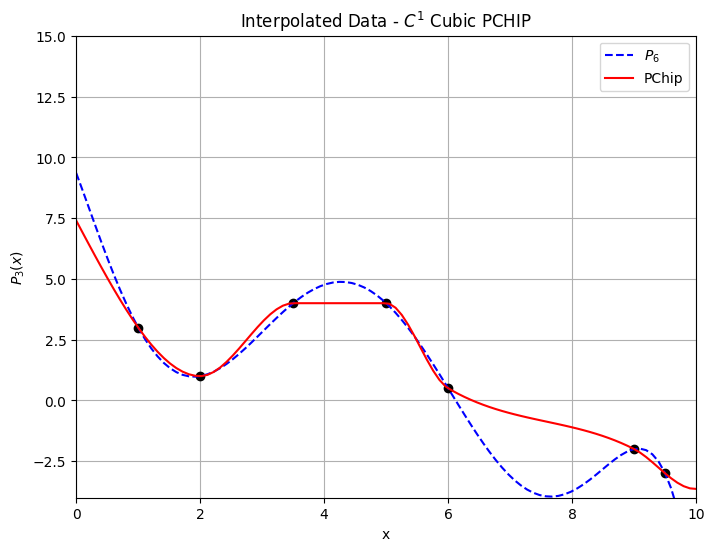

In [29]:
# Plot
# Interpolating polynmial through the data
P_lagrange = poly_interpolant(x, data)
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)

axes.plot(data[:,0], data[:,1], 'ko')
axes.plot(x, P_lagrange, 'b--',label='$P_{{{name}}}$'.format(name=N))
axes.plot(x, P_pchip, 'r',label='PChip')

axes.set_title("Interpolated Data - $C^1$ Cubic PCHIP")
axes.set_xlabel("x")
axes.set_ylabel("$P_3(x)$")
axes.set_xlim([0.0, 10.0])
axes.set_ylim([-4.0, 15.0])
axes.legend()
axes.grid()
plt.show()

#### Cubic Splines

Enforces continuity on second derivatives as well:

$$\mathcal{P}''_{k}(x_{k}) = \mathcal{P}''_{k-1}(x_k)$$

From our generalization before we know

$$\mathcal{P}''(s) = 6 (1-2s)(y_{k+1} - y_k) + (6s - 4) d_k + (6s-2) d_{k+1}$$

and our constraint now becomes

$$\mathcal{P}''_{k}(0) = \mathcal{P}''_{k-1}(1)$$

$$\mathcal{P}''_{k-1}(1) = 6 (1-2 \cdot 1)(y_{k} - y_{k-1}) + (6\cdot 1 - 4) d_{k-1} + (6\cdot 1-2) d_{k}$$

$$\mathcal{P}''_{k}(0) = 6 (1-2 \cdot 0)(y_{k+1} - y_k) + (6\cdot 0 - 4) d_k + (6\cdot 0-2) d_{k+1}$$

$$-6(y_{k} - y_{k-1}) + 2 d_{k-1} + 4 d_{k} = 6 (y_{k+1} - y_k) - 4 d_k -2  d_{k+1}$$

or rearrange knowns and unknowns to get.

$$
    2 d_{k-1} + 8 d_k + 2 d_{k+1} =  6 (y_{k+1} - y_{k-1})
$$

We now have constraints on choosing the $d_k$ values for all interior values of $k$.  Note that we still need to prescribe them at the boundaries of the full interval.

This forms a linear set of equations for the $d_k$s based on the $y_k$ values and can be reformulated into a tri-diagonal linear system

$$\begin{bmatrix}
         & \ddots  & \ddots  & \ddots  & &  &\\
         & 0 & 2 & 8 & 2 & 0 & & \\
         & & 0 & 2 & 8 & 2 & 0 & & & \\
         & &   & 0 & 2 & 8 & 2 & 0 & & \\
         & &    & & & \ddots & \ddots & \ddots &
\end{bmatrix}\begin{bmatrix}
    \vdots \\ d_{k-1} \\ d_{k} \\ d_{k+1} \\ \vdots
\end{bmatrix} = \begin{bmatrix}
    \vdots \\ 6 (y_{k} - y_{k-2}) \\ 6 (y_{k+1} - y_{k-1}) \\ 6 (y_{k+2} - y_{k}) \\\vdots
\end{bmatrix}$$

The boundaries are still left unconstrained and we must pick some rule to specify the derivatives there.

In [30]:
from scipy.interpolate import UnivariateSpline

data = numpy.array([[1.0, 3.0], [2.0, 1.0], [3.5, 4.0], [5.0, 4.0], [6.0, 0.5], [9.0, -2.0], [9.5, -3.0]])
x = numpy.linspace(0.0, 10, 100)

# C^2 Piece-wise Splines
# Note that to get an interpolant we need to set the smoothing
# parameters *s* to 0
P_spline = UnivariateSpline(data[:, 0], data[:, 1], s=0)

# C^1 Piece-wise PCHIP for reference
P_pchip = pchip_interpolate(data[:, 0], data[:, 1], x)


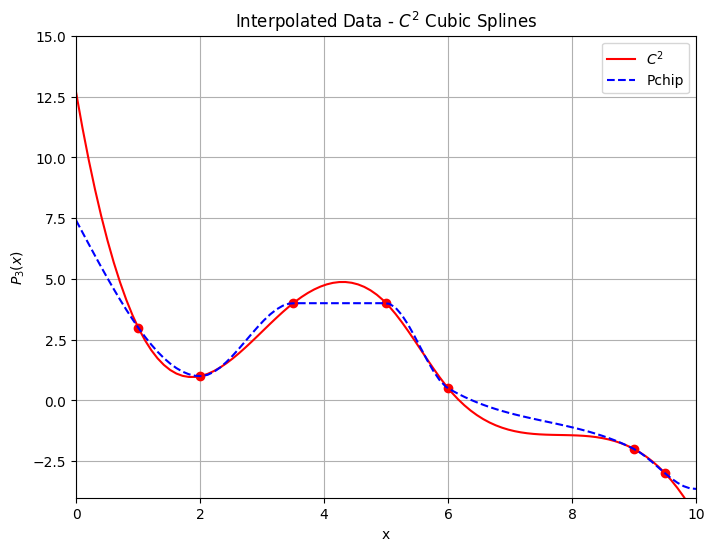

In [31]:
# Plot and compare to pchip

fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)

axes.plot(data[:,0], data[:,1], 'ro')
axes.plot(x, P_spline(x), 'r', label = '$C^2$')
axes.plot(x, P_pchip, 'b--', label = 'Pchip')
axes.set_title("Interpolated Data - $C^2$ Cubic Splines")
axes.set_xlabel("x")
axes.set_ylabel("$P_3(x)$")
axes.set_xlim([0.0, 10.0])
axes.set_ylim([-4.0, 15.0])
axes.legend(loc='best')
axes.grid()
plt.show()


### Let's compare all of these methods

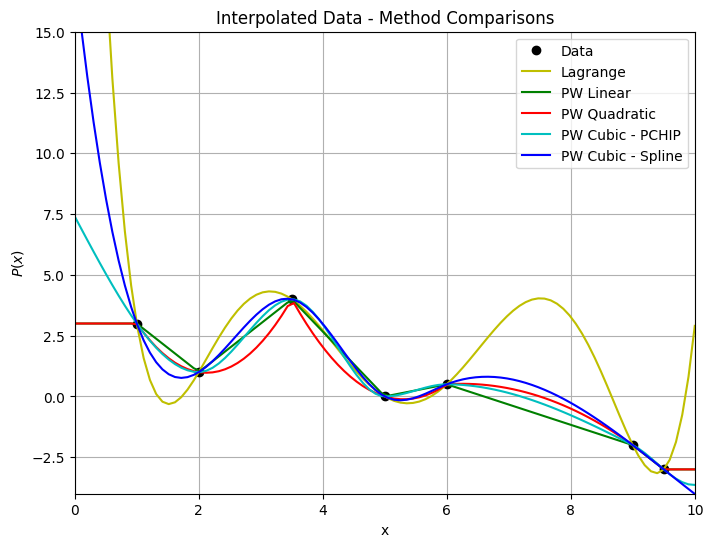

In [32]:
import scipy.interpolate as interpolate

data = numpy.array([[1.0, 3.0], [2.0, 1.0], [3.5, 4.0], [5.0, 0.0], [6.0, 0.5], [9.0, -2.0], [9.5, -3.0]])
x = numpy.linspace(0.0, 10, 100)

# Lagrange Basis
N = data.shape[0] - 1

lagrange_basis = numpy.ones((N + 1, x.shape[0]))
for i in range(N + 1):
    for j in range(N + 1):
        if i != j:
            lagrange_basis[i, :] *= (x - data[j, 0]) / (data[i, 0] - data[j, 0])

# Calculate full polynomial
P_lagrange = numpy.zeros(x.shape[0])
for n in range(N + 1):
    P_lagrange += lagrange_basis[n, :] * data[n, 1]

# C^0 Piece-wise linear
# P_pw_linear = numpy.interp(x, data[:, 0], data[:, 1])
P_linear = numpy.zeros(x.shape)
for n in range(1, N + 1):
    P_linear += ((data[n, 1] - data[n - 1, 1]) / (data[n, 0] - data[n - 1, 0]) * (x - data[n - 1, 0])
                         + data[n - 1, 1]) * (x > data[n - 1, 0]) * (x <= data[n, 0])

# Add end points for continuity
P_linear += numpy.ones(x.shape) * data[0, 1] * (x < data[0, 0])
P_linear += numpy.ones(x.shape) * data[-1, 1] * (x >= data[-1, 0])
# C^0 Piece-wise quadratic
P_quadratic = numpy.zeros(x.shape)
for k in range(1, N + 1, 2):
    p = numpy.polyfit(data[k - 1:k + 2, 0], data[k - 1:k + 2, 1], 2)
    P_quadratic += numpy.polyval(p, x) * (x > data[k - 1, 0]) * (x <= data[k + 1, 0])
# Add end points for continuity
P_quadratic += numpy.ones(x.shape) * data[0, 1] * (x < data[0, 0])
P_quadratic += numpy.ones(x.shape) * data[-1, 1] * (x >= data[-1, 0])

# C^1 Piece-wise PCHIP
P_pchip = interpolate.pchip_interpolate(data[:, 0], data[:, 1], x)

# C^2 Piece-wise Splines
P_spline = interpolate.UnivariateSpline(data[:, 0], data[:, 1], s=0)

# Plot
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)

axes.plot(data[:,0], data[:,1], 'ko', label="Data")
axes.plot(x, P_lagrange, 'y', label="Lagrange")
axes.plot(x, P_linear, 'g', label="PW Linear")
axes.plot(x, P_quadratic, 'r', label="PW Quadratic")
axes.plot(x, P_pchip, 'c', label="PW Cubic - PCHIP")
axes.plot(x, P_spline(x), 'b', label="PW Cubic - Spline")
axes.grid()

axes.set_title("Interpolated Data - Method Comparisons")
axes.set_xlabel("x")
axes.set_ylabel("$P(x)$")
axes.legend(loc='best')
axes.set_xlim([0.0, 10.0])
axes.set_ylim([-4.0, 15.0])

plt.show()

## Relationship to Regression

What if we have more data and want a lower degree polynomial but do not want to use a piece-wise defined interpolant?  
Regression techniques are often used to minimize a form of error between the data points $y_i$ at $x_i$ with an approximating function $f(x_i)$.  Note that this is NOT interpolation anymore!
**This is fitting!**

### Least-Squares

One way of doing this is to require that we minimize the least-squares error
$$
    E = \left( \sum^m_{i=1} |y_i - f(x_i)|^2 \right )^{1/2}.
$$
where as before we have data $y_i$ at locations $x_i$ and an approximating function $f(x_i)$.

From the beginning of our discussion we know we can write the interpolant as a system of linear equations which we can then solve for the coefficients of a monomial basis.  If we wanted to fit a line
$$
    \mathcal{P}_1(x) = p_0 + p_1 x
$$
to $N$ data points we would have
$$
   \begin{bmatrix}
        1 & x_1 \\
        1 & x_2 \\
        \vdots & \vdots \\
        1 & x_N
   \end{bmatrix} \begin{bmatrix}
       p_0 \\ p_1
   \end{bmatrix} = \begin{bmatrix}
       y_1 \\ y_2 \\ \vdots \\ y_N
   \end{bmatrix}
$$
or
$$
    A p = y
$$
What's wrong with this system?

This leads to the likelihood that there is no solution to the system as
$$
    A \in \mathbb{R}^{N \times 2}, p \in \mathbb{R}^{2 \times 1}, \text{  and  } y \in \mathbb{R}^{N \times 1}.
$$
There will only be a solution if the y vector is coplanar with it, which is likely not the case😞.

Instead we can solve the related least-squares system
$$
    A^T A p = A^T y
$$
whose solution minimizes the least-square error defined before as $E$.

Note:  In general, this is not the most stable way to solve least squares problems,  in general, using an orthogonalization technique like $QR$ factorization is better numerically.

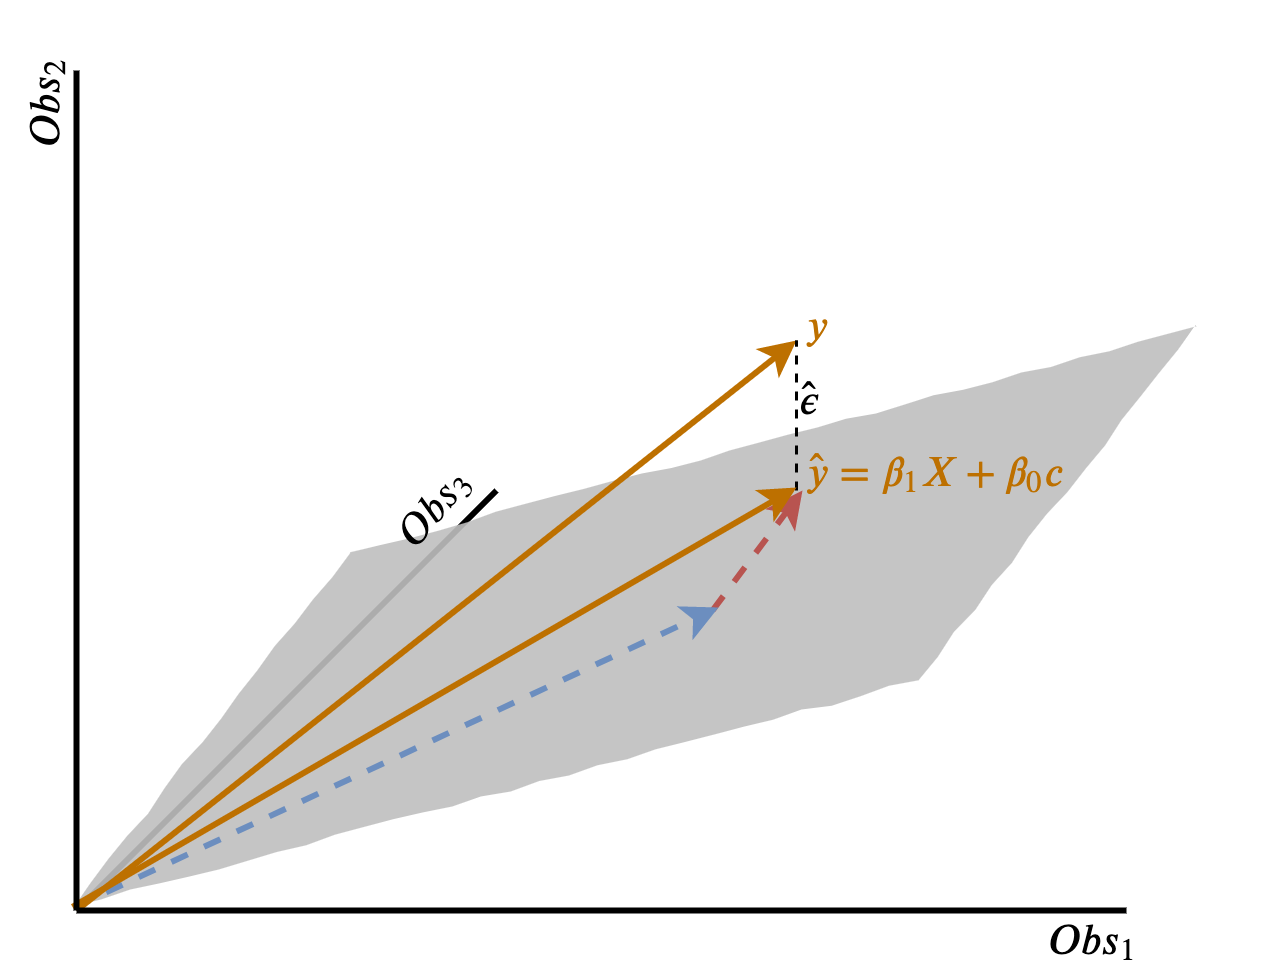

In [33]:
# Linear Least Squares Problem
N = 50
x = numpy.linspace(-1.0, 1.0, N)
y = x + numpy.random.random((N))

In [34]:
A = numpy.ones((x.shape[0], 2))
A[:, 1] = x
p = numpy.linalg.solve(numpy.dot(A.transpose(), A), numpy.dot(A.transpose(), y))
print('Normal Equations: p = {}'.format(p))
p = numpy.linalg.lstsq(A, y, rcond=None)[0]
print('Numpy Lstsq     : p = {}'.format(p))
f = lambda x: p[0] + p[1] * x
E = numpy.linalg.norm(y - f(x), ord=2)

Normal Equations: p = [0.49551706 0.93649633]
Numpy Lstsq     : p = [0.49551706 0.93649633]


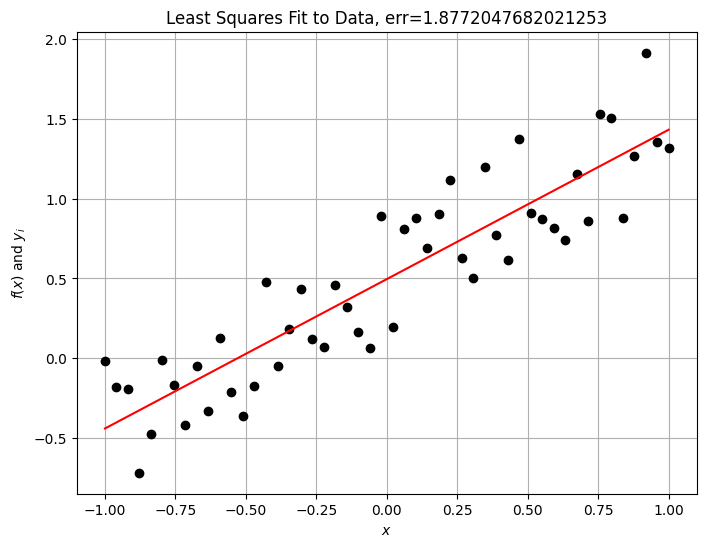

In [35]:
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, y, 'ko')
axes.plot(x, f(x), 'r')
axes.set_title("Least Squares Fit to Data, err={}".format(E))
axes.set_xlabel("$x$")
axes.set_ylabel("$f(x)$ and $y_i$")
axes.grid()

plt.show()

### Themes and variations

You can play all sorts of games, whether they are justified by the data or not,  for example we can fit the same random data with a function like

$$
    f(x) = p_0 + p_1\tanh(x)
$$

which is still a linear problem for the coefficients $p_0$ and $p_1$, however the vandermonde matrix now has columns of $\mathbf{1}$ and $\tanh\mathbf{x}$.

In [36]:
# Linear Least Squares Problem
A = numpy.ones((x.shape[0], 2))
A[:, 1] = numpy.tanh(x)

In [37]:
#p = numpy.linalg.solve(numpy.dot(A.transpose(), A), numpy.dot(A.transpose(), y))
p = numpy.linalg.lstsq(A, y,rcond=None)[0]
f = lambda x: p[0] + p[1] * numpy.tanh(x)
E = numpy.linalg.norm(y - f(x), ord=2)

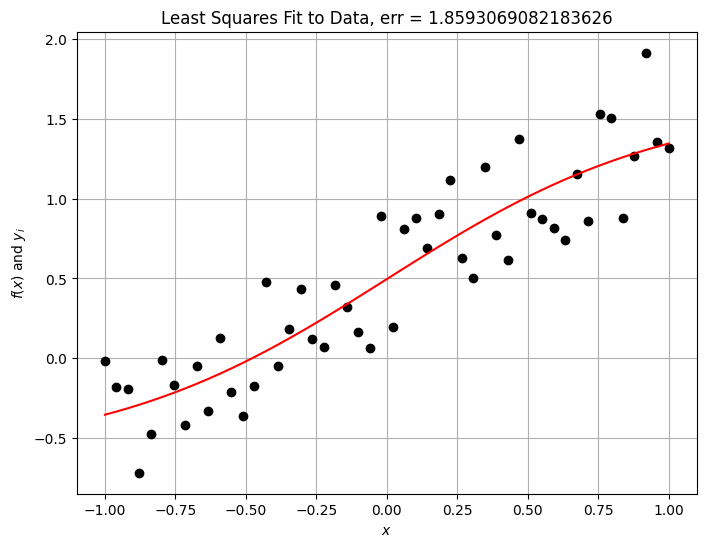

In [38]:
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, y, 'ko')
axes.plot(x, f(x), 'r')
axes.set_title("Least Squares Fit to Data, err = {}".format(E))
axes.set_xlabel("$x$")
axes.set_ylabel("$f(x)$ and $y_i$")
axes.grid()

plt.show()

### Let ye be warned...

![curve-fitting methods](https://imgs.xkcd.com/comics/curve_fitting.png)

(Original image can be found at [Curve Fitting](https://xkcd.com/2048/).)

# Higher Dimensional interpolation

Much of the machinery for interpolation in 1-dimension can be extended in straightforward ways to higher dimensions.  Again, many of these methods are provided by `scipy.interpolate` but their mechanisms are straightforward to derive.


Here we will consider two relative simple extensions

* bi-polynomial (bi-linear) interpolation on a regular mesh
* linear interpolation on Triangles

# Notebook Summary: Interpolation

This notebook provides a comprehensive overview of various interpolation techniques, their mathematical foundations, and their applications.

## What is Interpolation?

Interpolation is the process of constructing a (usually) continuous function that passes exactly through a given set of discrete data points. It is distinct from fitting, which aims to find a function that approximates the data while minimizing some error metric.

## Types of Interpolation Covered:

### 1. Polynomial Interpolation
- **Concept:** Using a single polynomial of degree N to interpolate N+1 data points. This means finding a polynomial that goes through every single data point provided.
- **Mathematical Basis:** Based on the theorem that there is a unique polynomial of degree N that passes through N+1 distinct points. The polynomial can be written as $P_N(x) = p_0 + p_1 x + \cdots + p_N x^N$. Here, $P_N(x)$ represents the interpolating polynomial of degree N, and $p_0, p_1, \ldots, p_N$ are the coefficients we need to find. The coefficients $p_i$ can be found by solving a linear system $V(\mathbf{x})\mathbf{p} = \mathbf{y}$, where $V$ is the Vandermonde matrix with entries $V_{ij} = x_i^j$, $\mathbf{p}$ is the vector of coefficients $(p_0, p_1, \ldots, p_N)^T$, and $\mathbf{y}$ is the vector of data values $(y_0, y_1, \ldots, y_N)^T$. This matrix equation represents a system of N+1 linear equations with N+1 unknowns (the coefficients $p_i$).
- **Bases:** Discusses the monomial basis ($1, x, x^2, \ldots, x^N$) and the Lagrange basis. The monomial basis is the standard form of a polynomial. The Lagrange basis consists of polynomials $\ell_i(x) = \prod^{N}_{j=0, j \neq i} \frac{x - x_j}{x_i - x_j}$ for $i=0, \ldots, N$. These are special polynomials, one for each data point. They have the key property that $\ell_i(x_j) = \delta_{ij} = \left\{\begin{matrix} 0 & i\neq j \\ 1 & i=j\\ \end{matrix}\right.$. This means that the $i$-th Lagrange polynomial is equal to 1 at the $i$-th data point's x-coordinate and 0 at all other data points' x-coordinates. This property makes the weights of the interpolant in the Lagrange basis simply the y-values of the data points: $\mathcal{P}_N(x) = \sum^{N}_{i=0} y_i \ell_i(x)$. This form is computationally advantageous because you don't need to solve a linear system to find the coefficients; they are simply the y-values of your data.
- **Pros:** Provides a smooth interpolant through all data points.
- **Cons:** Can exhibit undesirable oscillations (Runge's phenomenon) for high-degree polynomials, especially with equally spaced points.

### 2. Piecewise Polynomial Interpolation
- **Concept:** Using lower-order polynomials to interpolate the data in segments. Instead of one high-degree polynomial, you use several lower-degree polynomials, each covering a different part of the data.
- **Types:**
    - **Piecewise Linear ($C^0$):** Connects data points with straight lines. Simple but not smooth (sharp corners at data points). The interpolant on the interval $[x_k, x_{k+1}]$ is given by $\mathcal{P}_k(x) = y_k(1 - s) + y_{k+1}s$, where $s = \frac{x - x_k}{x_{k+1} - x_k}$ is the fractional distance of x within the segment $[x_k, x_{k+1}]$. This is essentially a linear combination of the two y-values, weighted by how close x is to each point.
    - **Piecewise Quadratic ($C^0$):** Uses quadratic polynomials over segments, often three points at a time. Still only guarantees continuity of the function itself ($C^0$ continuity).
    - **Piecewise Cubic Hermite Interpolation (PCHIP) ($C^1$):** Uses cubic polynomials and enforces continuity of both the function and its first derivative at the data points ($C^1$ continuity). This results in a smoother curve than piecewise linear or quadratic interpolation, and it also preserves monotonicity if the data is monotonic.
    - **Cubic Splines ($C^2$):** Uses cubic polynomials and enforces continuity of the function, its first derivative, and its second derivative at the data points ($C^2$ continuity). This results in the smoothest possible interpolant among piecewise cubic methods. The continuity constraints on the second derivative lead to a tridiagonal linear system for the derivatives at the nodes that needs to be solved.
- **Mathematical Basis:** Involves solving smaller systems of equations for the coefficients of the polynomials in each segment, with continuity constraints at the segment boundaries. Affine transformations can be used to map each interval to a standard interval like $[0, 1]$ or $[-1, 1]$ for easier calculation.
- **Pros:** Avoids the oscillations of high-degree polynomial interpolation. Allows for control over the smoothness of the interpolant by choosing the level of derivative continuity ($C^0, C^1, C^2$).
- **Cons:** The resulting function is only piecewise smooth, not globally smooth like a single high-degree polynomial.

## Error Analysis

- **Lagrange Remainder Theorem:** States that the error in polynomial interpolation is related to the $(N+1)$-th derivative of the function and a product term $Q(x) = \prod^N_{i=0} (x - x_i)$. The error is given by $R_N(x) = Q(x) \frac{f^{(N+1)}(c)}{(N+1)!}$ for some $c$ in the interval. $R_N(x)$ is the remainder or error term, $f^{(N+1)}(c)$ is the $(N+1)$-th derivative of the original function evaluated at some unknown point c, and $Q(x)$ is a polynomial that has roots at the interpolation points $x_i$.
- **Minimizing Error:** Minimizing the error requires minimizing $|Q(x)|$. This can be achieved by choosing the interpolation points strategically to minimize the maximum value of $Q(x)$ over the interval.

## Chebyshev Polynomials and Nodes

- **Concept:** Another set of orthogonal polynomials with special properties, defined by the recurrence relation $T_k(x) = 2 x T_{k-1}(x) - T_{k-2}(x)$. These polynomials have unique properties related to their roots and extrema.
- **Chebyshev Nodes:** The roots of the Chebyshev polynomials, particularly the first kind, are optimal choices for interpolation points on the interval $[-1, 1]$ as they minimize the maximum value of $|Q(x)|$. These nodes are given by $x_k = \cos\left( \frac{(2k - 1) \pi}{2 N} \right )$ for $k=1, \ldots, N$. **It's important to note that the Chebyshev polynomials themselves are not typically used as the basis for interpolation in this method; rather, their roots (the Chebyshev nodes) are used as the data points for constructing the interpolating polynomial, often using the Lagrange basis.** By using these specific points as your data locations, you minimize the oscillations of the resulting polynomial interpolant compared to using equally spaced points.
- **Affine Transformation:** Chebyshev nodes, which are defined on the interval $[-1, 1]$, can be transformed to any arbitrary interval $[a, b]$ using an affine transformation: $x(s) = \frac{a+b}{2} + \frac{b -a}{2} s$. This allows you to use the advantageous properties of Chebyshev nodes for interpolation on any desired interval.
- **Pros:** Interpolation at Chebyshev nodes significantly reduces the oscillations compared to equally spaced points, leading to better approximations for functions like Runge's function.
- **Cons:** Calculating Chebyshev nodes requires specific formulas.

## Relationship to Regression

- **Concept:** While interpolation passes exactly through data points, regression aims to find a function that best fits the data, often with a lower-degree polynomial than the number of data points.
- **Least Squares:** A common regression technique that minimizes the sum of the squared differences between the data and the approximating function. This often involves solving an overdetermined linear system $A^T A p = A^T y$ using the normal equations or more robust methods like QR factorization. Here, A is the design matrix, p is the vector of coefficients you are solving for, and y is the vector of your data values. $A^T A p = A^T y$ is the system of normal equations that arises from minimizing the sum of the squared errors.

## Higher Dimensional Interpolation

- **Concept:** Extending 1-dimensional interpolation techniques to multiple dimensions.
- **Types Mentioned:** Bi-polynomial (bi-linear) interpolation on a regular mesh and linear interpolation on triangles.

This notebook demonstrates these concepts through code examples and visualizations, highlighting the trade-offs between different interpolation methods in terms of accuracy, smoothness, and computational complexity.